### Load important packages

In [1]:
from ase.io import read, write
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.core import Lattice, Structure, Molecule
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.core import Composition, Structure
from typing import List, Tuple

import re, joblib, json
import numpy as np
import pandas as pd
from keras.utils import to_categorical

import pandas as pd
from ase.io import read, write
from ase import Atoms
from ase.db import connect
import numpy as np
import sys, os
from spglib import get_spacegroup, find_primitive, standardize_cell
import pymatgen 
from pymatgen.io.ase import AseAtomsAdaptor
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score # for cross-validation
from datetime import datetime 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler
from pymatgen.core import Composition, Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer


import os

bridge = AseAtomsAdaptor()

import warnings
warnings.filterwarnings("ignore")


2025-01-08 08:01:56.791236: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-08 08:01:56.796071: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-08 08:01:56.832199: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-08 08:01:56.832246: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-08 08:01:56.832276: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

### Pretty ploting routine

In [2]:
def reset_plt(ticksize,fontsize):
    #plt.style.use('whitegrid')
    plt.rcParams['xtick.labelsize'] = ticksize
    plt.rcParams['ytick.labelsize'] = ticksize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['legend.facecolor'] = 'white'
    #plt.rcParams['axes.formatter.limits'] = (-1,3)
    #plt.rcParams['axes.linewidth'] = 2.25
    

def put_ticks(this_fig,this_ax):
    this_ax.xaxis.set_tick_params(which = 'major', direction = 'in', width = 2.5, length = 12, zorder = 1, top = True)
    this_ax.yaxis.set_tick_params(which = 'major', direction = 'in', width = 2.5, length = 12, zorder = 1, right = True)
    this_ax.xaxis.set_tick_params(which = 'minor', direction = 'in', width = 1.5, length = 6, zorder = 1, top = True)
    this_ax.yaxis.set_tick_params(which = 'minor', direction = 'in', width = 1.5, length = 6, zorder = 1, right = True)
    dx = -3/72
    dy = -3/72
    y_offset = matplotlib.transforms.ScaledTranslation(0, dy, this_fig.dpi_scale_trans)
    x_offset = matplotlib.transforms.ScaledTranslation(dx, 0, this_fig.dpi_scale_trans)

    for label in this_ax.xaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + y_offset)

    for label in this_ax.yaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + x_offset)


### Load all disordered cif files 

In [3]:
import itertools
root_dir = ['SrO_quaternary','LaO_Quaternary']
list_dir = []
for root in root_dir:
    for file in os.listdir(root):
        list_dir.append(os.path.join(root,file))
# Extend the list
listed_dir = list_dir
print(len(listed_dir))


cif_list = []
ending = []
for cif in listed_dir:
    end = cif.split('.')[-1]
    if end not in ending:
        ending.append(cif.split('.')[-1])

    #cif_atom = read(os.path.join(root_dir,cif))
    #cif_list.append(cif_atom)
ending

9754


['cif']

In [4]:
drop_list = ['Tc','Fm','Md','No','Lr','Rf','Db','Sg','Bh','Hs','Mt','Ds','Rg','Cn','Nh','Fl','Mc','Lv','Ts','Og']

new_listed_dir = []
pymatgen_list = []
#spacegroup = []

for system_dir in listed_dir:
    total_dir = system_dir #os.path.join(root_dir,system_dir)
    drop = False
    try:
        pymatgen_struc = Structure.from_file(total_dir);
        sga = SpacegroupAnalyzer(pymatgen_struc,symprec=0.1)
        #refined_struc = sga.get_refined_structure()
        #sga = SpacegroupAnalyzer(refined_struc,symprec=0.01)
        #strc_symmetry = sga.get_symmetrized_structure()
        
    except:
        print('Error, ', total_dir)
        continue
    

    for elem in drop_list:
        if elem in pymatgen_struc.formula:
            drop = True 
    if drop:
        print('Dropped, ', total_dir)
        continue
    else:
        new_listed_dir.append(total_dir)
        pymatgen_list.append(pymatgen_struc)


    
print(len(pymatgen_list))

Error,  SrO_quaternary/46-60_CollCode125352.cif
Error,  SrO_quaternary/46-60_CollCode125353.cif
Error,  SrO_quaternary/46-60_CollCode125605.cif
Error,  SrO_quaternary/46-60_CollCode135044.cif
Error,  SrO_quaternary/46-60_CollCode135045.cif
Error,  SrO_quaternary/46-60_CollCode136254.cif
Error,  SrO_quaternary/46-60_CollCode137477.cif
Error,  SrO_quaternary/46-60_CollCode138659.cif
Error,  SrO_quaternary/46-60_CollCode138730.cif
Error,  SrO_quaternary/46-60_CollCode151532.cif
Error,  SrO_quaternary/46-60_CollCode151704.cif
Error,  SrO_quaternary/46-60_CollCode151736.cif
Error,  SrO_quaternary/46-60_CollCode152393.cif
Error,  SrO_quaternary/46-60_CollCode152904.cif
Error,  SrO_quaternary/46-60_CollCode154749.cif
Error,  SrO_quaternary/46-60_CollCode154814.cif
Error,  SrO_quaternary/46-60_CollCode155448.cif
Error,  SrO_quaternary/46-60_CollCode157379.cif
Error,  SrO_quaternary/46-60_CollCode157380.cif
Error,  SrO_quaternary/46-60_CollCode157381.cif
Error,  SrO_quaternary/46-60_CollCode157

In [5]:
import itertools
all_unique_elements = []

for structure in pymatgen_list:
    all_elements = [list(comp.get_el_amt_dict().keys())for comp in structure.species_and_occu]
    uniqueue_elements = np.unique(list(set(itertools.chain(*all_elements))))
    all_unique_elements.append(uniqueue_elements)

all_unique_elements = np.unique(list(set(itertools.chain(*all_unique_elements))))

df = pd.read_csv('WyCryst/data/atomic_features.csv')
for element in all_unique_elements:
    if element not in df['Symbol'].values:
        print(element)
all_unique_elements

array(['Ag', 'Al', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca',
       'Cd', 'Ce', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F',
       'Fe', 'Ga', 'Gd', 'Ge', 'H', 'Hf', 'Hg', 'Ho', 'I', 'In', 'Ir',
       'K', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Nd',
       'Ni', 'Np', 'O', 'Os', 'P', 'Pb', 'Pd', 'Pr', 'Pt', 'Rb', 'Re',
       'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si', 'Sm', 'Sn', 'Sr', 'Ta',
       'Tb', 'Te', 'Th', 'Ti', 'Tl', 'Tm', 'U', 'V', 'W', 'Y', 'Yb', 'Zn',
       'Zr'], dtype='<U2')

### Crystal representation of the disordered structures

To Do: 
- Fix the charge disorder issue 
- Write the model in pytorch 

In [103]:
class Crystal_representation:
    def __init__(
            self,
            pymatgen_list: List[Structure] ,
            verbose:bool=False,
            remove_P1_spacegroup = True,
            max_wyckoff_sites = None,
            max_site_disorder = None,
            max_wyckoff_multiplier = None
    ):
        """
        Class to represent the crystal structure in a format that can be used for machine learning
        Args:
            pymatgen_list: List of pymatgen structure objects
            verbose: Print the features
            remove_P1_spacegroup: Remove the P1 spacegroup
            max_wyckoff_sites: Maximum number of wyckoff sites
            max_site_disorder: Maximum site disorder
            max_wyckoff_multiplier: Maximum wyckoff multiplier
        """
        
        # Initialize the input parameters
        self.pymatgen_list = pymatgen_list
        self.verbose = verbose
        self.max_wyckoff_sites = max_wyckoff_sites
        self.remove_P1_spacegroup = remove_P1_spacegroup
        self.max_site_disorder = max_site_disorder
        self.max_wyckoff_multiplier = max_wyckoff_multiplier
        
        # Initialize the total site disorder and wyckoff sites
        self.total_site_disorder = 0
        self.total_wyckoff_sites = 0
        self.total_wyckoff_multiplier = 0

        # Initialize the filter size
        self.P1_spacegroup_total_remove = 0
        self.max_wyckoff_sites_total_remove = 0
        self.max_site_disorder_total_remove = 0
        self.max_wyckoff_multiplier_total_remove = 0

        # Initialize the spacegroup list
        self.spacegroup_list = []

        # Initialize max_site_disorder_list
        self.max_site_disorder_list = []

        # Initialize the total wyckoff multiplier list
        self.total_wyckoff_multiplier_list = []

        # Initialize the elemental features
        self.get_element_features()

        # Get the crystal and wyckoff features
        self.WyckCrust_representation()

    
    def WyckCrust_representation(self)-> None:

        # Loop through all the structures
        self.total_crystal_features = []
        self.total_wyckoff_dict = []
        count = 0 
        for pymatgen_struc in self.pymatgen_list:
            #print('Structure:',pymatgen_struc.composition.reduced_formula,count)
            count += 1
            # Symmetrize the structure
            strc_symmetry, spacegroup = self.symmetrize_symmetrized_structure(pymatgen_struc)
            # Get the crystal features
            self.total_crystal_features.append(self.get_crystal_features(pymatgen_struc,spacegroup))
            # Get the wyckoff dictionary
            self.total_wyckoff_dict.append(self.get_wyckoff_dict(strc_symmetry))
        
        # Get the atomistic features by looping through the wyckoff dictionary
        self.total_atomistic_features = []
        self.total_mask_tensor = []
        self.drop_index = []

        # Limit the maximum number of wyckoff sites and site disorder if specified
        if self.max_wyckoff_sites:
            if self.max_wyckoff_sites < self.total_wyckoff_sites:
                self.total_wyckoff_sites = self.max_wyckoff_sites

        # Limit the maximum site disorder and wyckoff multiplier if specified
        if self.max_site_disorder:
            if self.max_site_disorder < self.total_site_disorder:
                self.total_site_disorder = self.max_site_disorder
        
        # Limit the maximum wyckoff multiplier if specified
        if self.max_wyckoff_multiplier:
            if self.max_wyckoff_multiplier < self.total_wyckoff_multiplier:
                self.total_wyckoff_multiplier = self.max_wyckoff_multiplier

        # Loop through all the wyckoff dictionaries and get the atomistic features
        for idx, wyckoff_dict in enumerate(self.total_wyckoff_dict):

            # Filter the structures based on the spacegroup
            if self.remove_P1_spacegroup:
                if self.spacegroup_list[idx] == 1:
                    self.drop_index.append(idx)
                    self.P1_spacegroup_total_remove += 1
                    #print('P1_spacegroup:',idx)
                    continue
            
            # Filter the structures based on the maximum number of wyckoff sites
            if len(wyckoff_dict) > self.total_wyckoff_sites:
                self.drop_index.append(idx)
                self.max_wyckoff_sites_total_remove += 1
                #print('Max_wyckoff_site:',idx)
                continue
            
            # Filter the structures based on the maximum site disorder
            max_site_disorder = self.max_site_disorder_list[idx]
            if max_site_disorder > self.total_site_disorder:
                self.drop_index.append(idx)
                self.max_site_disorder_total_remove += 1
                #print('Max_site_disorder:',idx)
                continue
            
            # Filter the structures based on the maximum wyckoff multiplier
            max_wyckoff_multiplier = self.total_wyckoff_multiplier_list[idx]
            if max_wyckoff_multiplier > self.total_wyckoff_multiplier:
                self.drop_index.append(idx)
                self.max_wyckoff_multiplier_total_remove += 1
                #print('Max_wyckoff_multiplier:',idx)
                continue

            # Filter charge disorder states
            charge_disorder = [y['charge_disorder'] for x,y in wyckoff_dict.items()]
            if any(charge_disorder):
                self.drop_index.append(idx)
                #print('Charge Disorder:',idx)
                continue 
            
            atomic_features, mask_tensor = self.get_atomistic_features(wyckoff_dict)
            self.total_atomistic_features.append(atomic_features)
            self.total_mask_tensor.append(mask_tensor)

            continue

        # Drop the structures that do not meet the criterias
        self.total_crystal_features = np.array([y for i,y in enumerate(self.total_crystal_features) if i not in self.drop_index])
        self.total_wyckoff_dict = [y for i,y in enumerate(self.total_wyckoff_dict) if i not in self.drop_index]

        self.total_atomistic_features = np.array(self.total_atomistic_features)
        self.total_mask_tensor = np.array(self.total_mask_tensor)

    def symmetrize_symmetrized_structure(self,pymatgen_struc:Structure,) -> Tuple[Structure,int]:
        """
        Symmetrize the structure and get the spacegroup number
        Args:
            pymatgen_struc: pymatgen structure object
        Returns:
            strc_symmetry: Symmetrized structure
            spacegroup: Spacegroup number
        
        """

        # Symmetry analysis 
        sga = SpacegroupAnalyzer(pymatgen_struc, symprec=0.1)
        strc_conv = sga.get_refined_structure()
        sga = SpacegroupAnalyzer(strc_conv, symprec=0.01)
        strc_symmetry = sga.get_symmetrized_structure()
        spacegroup = sga.get_space_group_number()
        self.spacegroup_list.append(spacegroup)

        return strc_symmetry, spacegroup

    def get_element_features(self)-> None:
        """
        Get the elemental features from the data folder
        """
        
        # Load the cgcnn embedding
        elem_embedding_file = 'WyCryst/data/atom_init.json'
        with open(elem_embedding_file) as f:
            elem_embedding = json.load(f)
        self.elem_embedding = {int(key): value for key, value
                            in elem_embedding.items()}
        
        feat_cgcnn = []
        for key, value in self.elem_embedding.items():
            feat_cgcnn.append(value)
        self.feat_cgcnn = np.array(feat_cgcnn)
                
        # Elemental categorical features with 1 element extra for nothingness
        self.E_v = to_categorical(np.arange(0, self.feat_cgcnn.shape[0]+1, 1))
        

    def get_crystal_features(self,pymatgen_struc:Structure,spacegroup:int)-> np.array:
        """
        Function to get the crystal features
        Args:
            pymatgen_struc: pymatgen structure object
            spacegroup: Spacegroup number
        Returns:
            crystal_features: Crystal features of lattice constants and spacegroup
        """

        # Get the lattice information
        lattice = pymatgen_struc.lattice
        abc = np.array(lattice.abc) # either array or 3x3 matrix
        ang = np.array(lattice.angles)

        assert len(abc) == 3, 'Lattice constants should be 3'
        assert len(ang) == 3, 'Lattice angles should be 3'
        lattice_constants = np.concatenate((abc, ang), axis=0)

        # Ont-hot crystal system featurizer
        sg_cat = np.zeros((230))
        sg_cat[spacegroup-1] = 1
        sg_cat = sg_cat
        sg_cat_list = sg_cat

        # Append lattice constants and spacegroup
        crystal_features = np.concatenate((lattice_constants, sg_cat_list), axis=0)
        if self.verbose:
            print('Lattice Constants:', lattice_constants.shape)
            print('Spacegroup:',sg_cat_list.shape)
            print('Crystal Features:',crystal_features.shape)
            print('---------------------------------')

        return crystal_features
    

    def get_wyckoff_dict(self,strc_symmetry:Structure)-> dict:
        """
        Get the wyckoff dictionary
        Args:
            strc_symmetry: Symmetrized structure
        Returns:
            wyckoff_dict: Dictionary of the wyckoff positions, species and fractional coordinates
        """
        wyckoff_dict = {}
        total_wyckoff_sites = 0
        max_disorder = 0
        max_wyckoff_multiplier = 0
        # Loop through all the equivalent sites
        for idx, sites in enumerate(strc_symmetry.equivalent_sites):
            site = sites[0]

            # Get the wyckoff position, species and fractional coordinates
            wyckoff_position = strc_symmetry.wyckoff_symbols[idx]
            species_dict = site.species.get_el_amt_dict()
            frac_coords = site.frac_coords
            Z_species = np.array([int(element.number) for element in site.species.elements ])

            # Check if some of the Z_species are the same
            if len(Z_species) != len(np.unique(Z_species)):
                charge_disorder = True
            else:
                charge_disorder = False
            
            # Update the total site disorder
            if len(species_dict) > self.total_site_disorder:
                self.total_site_disorder = len(species_dict)
            
            # Update the total wyckoff multiplier
            if int(wyckoff_position[:-1]) > self.total_wyckoff_multiplier:
                self.total_wyckoff_multiplier = int(wyckoff_position[:-1])

            # Update the local max disorder
            if len(species_dict) > max_disorder:
                max_disorder = len(species_dict)
            
            # Update the local max wyckoff multiplier
            if int(wyckoff_position[:-1]) > max_wyckoff_multiplier:
                max_wyckoff_multiplier = int(wyckoff_position[:-1])
            

            # Add the information to the dictionary
            wyckoff_dict[idx] = {'wyckoff':wyckoff_position,'species': species_dict,
                                  'frac_coords': frac_coords, 'Z_species': Z_species,
                                  'charge_disorder': charge_disorder
                                }

            total_wyckoff_sites += 1
        
        # Update the total number of wyckoff sites
        if total_wyckoff_sites > self.total_wyckoff_sites:
            self.total_wyckoff_sites = total_wyckoff_sites
        
        # Append the local max disorder and wyckoff multiplier to the list
        self.max_site_disorder_list.append(max_disorder)

        # Append the local max wyckoff multiplier to the list
        self.total_wyckoff_multiplier_list.append(max_wyckoff_multiplier)

        return wyckoff_dict

    
    def get_atomistic_features(self,wyckoff_dict_struc:dict)-> np.array:
        """
        Function to get the atomistic features
        Args:
            wyckoff_dict: Dictionary of the wyckoff positions, species and fractional coordinates for the whole structure
        Returns:
            stucture_feature: Atomistic features of the categorical, CGCNN, fractional coordinates, wyckoff letter and wyckoff multiplier
        """

        # Create feature matrix
        stucture_feature = []
        # Loop through all the wyckoff sites
        for idx,wyckoff_dict in wyckoff_dict_struc.items():
            #print('Wyckoff:',wyckoff_dict['wyckoff'])   
            # Extract the information from the wyckoff dictionary
            wyckoff = wyckoff_dict['wyckoff'] # Wyckoff position
            species = wyckoff_dict['species'] # Element species and occupancy
            occupancy_species = np.array([species[atom_element] for atom_element in species.keys()]) # Occupancy of the species
            Z_species = wyckoff_dict['Z_species'] # Atomic number of the species
            N_species = len(species) # Total number of species

            # Check if the sum of occupancy is 1
            if np.sum(occupancy_species) != 1:
                # add vacancy to the end of the species
                occ_X = 1 - np.sum(occupancy_species)
                species['X'] = occ_X
                Z_species = np.append(Z_species,0)
                occupancy_species = np.append(occupancy_species,occ_X)
                N_species += 1

            assert np.sum(occupancy_species) == 1, 'Sum of occupancy should be 1'

            #print(Z_species,occupancy_species,species)

            # Catagorical layer
            onehot = self.E_v[:, Z_species - 1]*occupancy_species # index with 0, where X is the last element 
            if N_species > 1: # if there is more than 1 species than sum the onehot so its 1 dimensional
                onehot = np.sum(onehot,axis=1)
            else:
                onehot = onehot.flatten()
            assert np.sum(onehot) == 1, 'Sum of onehot should be 1'            

            # Fractional coordinates layer
            frac_coords = np.array(wyckoff_dict['frac_coords'])

            # Wyckoff multiplier layer, where the multiplicity is multiplied by the occupancy of the species
            wyckoff_multiplier = np.zeros((self.total_wyckoff_multiplier+1)) # maximum wyckoff multiplier + 1 for zero padding
            wyckoff_multiplier[int(wyckoff[:-1])-1] = 1 # index 1 is equal to 1, index 2 is equal to 2, etc. index 0 is equal to 0
            #wyckoff_multiplier = np.array([int(wyckoff[:-1])])

            # Wyckoff letter layer
            wyckoff_letter = np.zeros((27)) # 26 letters in the alphabet + 1 for zero padding
            site_num = ord(re.sub('[^a-zA-Z]+', '',wyckoff )) - 96 # index 1 is equal to a, index 2 is equal to b, etc. index 0 is equal to 0
            wyckoff_letter[site_num] = 1
           
            # Concatenate all the features
            atomistic_features = np.concatenate((onehot, wyckoff_multiplier,frac_coords, wyckoff_letter ), axis=0)
            # Append the features to the structure feature list
            stucture_feature.append(atomistic_features)

            if self.verbose:
                print('Wyckoff:', wyckoff)
                print('Species:', species)
                print('Occupancy:', occupancy_species)
                print('Z:', Z_species)
                print('N:', N_species)
                print('Onehot:', onehot.shape, onehot)
                print('Frac_coords:', frac_coords.shape, frac_coords.T)
                print('Wyckoff_multiplier:',wyckoff_multiplier.shape, wyckoff_multiplier.T)
                print('Wyckoff Letter:', wyckoff_letter.shape, wyckoff_letter.T)
                print('Atomistic Features:', atomistic_features.shape)
                print('---------------------------------')

        # Transpose the structure feature 
        stucture_feature = np.array(stucture_feature).T
        # Reshape the structure feature to the maximum number of wyckoff sites and pad with zeros
        reshaped_structure_feature = np.zeros((atomistic_features.shape[0],self.total_wyckoff_sites))
        
        # Add a ones in the zero padding to indicate that there is no atom
        reshaped_structure_feature[100,:] = 1 # Onehot at index -1
        reshaped_structure_feature[101,:] = 1 # Wyckoff multiplier at index 0
        reshaped_structure_feature[-27,:] = 1 # Wyckoff letter at index 0
        
        # Add the structure feature to the reshaped structure feature    
        reshaped_structure_feature[:,:stucture_feature.shape[1]] = stucture_feature

        # Swap the two axis to get the correct shape for PyTorch (wyckoff_sites, features) for Tensorflow the channel dim are in the end, while for PyTorch is in the start 
        reshaped_structure_feature = np.swapaxes(reshaped_structure_feature,0,1)

        # Create masked tensor. Ones are features to train on and zeros are indicators to zero padding
        mask = np.zeros((atomistic_features.shape[0],self.total_wyckoff_sites))
        mask[:,:stucture_feature.shape[1]] = np.ones_like(stucture_feature) 

        # Swap 


        if self.verbose:
            print('Structure Feature:', reshaped_structure_feature.shape)
            print('---------------------------------')


        return reshaped_structure_feature, mask

#new_pymatgen_list = [pymatgen_list[i] for i in range(len(pymatgen_list)) if i not in drop_index]

crystal_rep = Crystal_representation(pymatgen_list,verbose=False,max_wyckoff_sites=24,
                                     max_wyckoff_multiplier=50,
                                     max_site_disorder=2, remove_P1_spacegroup=True)



In [ ]:
print_value = crystal_rep.total_atomistic_features
print('Total crystal features:',crystal_rep.total_crystal_features.shape)
print('Total number of structures:',print_value.shape[0])
print('Total atomic representation:',print_value.shape)
print('One hot:',print_value[:,:,:101].shape, 'Max:',np.max(np.sum(print_value[:,:,:101],axis=2)))
print('Frac. coordiante:',print_value[:,:,-30:-27].shape, 'Max:',np.max(print_value[:,:,-30:-27]))
print('Wyckoff multiplier:',print_value[:,:,101:-30].shape, 'Max:',np.max(print_value[:,:,101:-30]))
print('Wyckoff Letter:',print_value[:,:,-27:].shape, 'Max:',np.max(print_value[:,:,-27:]))

Total crystal features: (9017, 236)
Total number of structures: 9017
Total atomic representation: (9017, 24, 182)
One hot: (9017, 24, 101) Max: 1.0
Frac. coordiante: (9017, 24, 3) Max: 1.0
Wyckoff multiplier: (9017, 24, 52) Max: 1.0
Wyckoff Letter: (9017, 24, 27) Max: 1.0


In [46]:
print_value[20,-30:-25,0]

array([], dtype=float64)

In [7]:
index = 4643 #4644 120
print('Structure:',index)
print('Total directory:',new_listed_dir[index])
pymatgen_struc = pymatgen_list[index]
ase_struc = read(new_listed_dir[index])
sga = SpacegroupAnalyzer(pymatgen_struc, symprec=0.1)
strc_conv = sga.get_refined_structure()
sga = SpacegroupAnalyzer(strc_conv, symprec=0.01)
strc_symmetry = sga.get_symmetrized_structure()
strc_symmetry

Structure: 4643
Total directory: SrO_quaternary/YourCustomFileName_CollCode68862.cif


SymmetrizedStructure
Full Formula (Sr1.84 La6.16 Cu7.66 O20)
Reduced Formula: Sr1.84La6.16Cu7.66O20
Spacegroup: P4/mbm (127)
abc   :  10.746800  10.746800   3.863300
angles:  90.000000  90.000000  90.000000
Sites (36)
  #  SP                         a       b    c  Wyckoff
---  --------------------  ------  ------  ---  ---------
  0  Sr2+:0.23, La3+:0.77  0.97    0.7603  0.5  8j
  1  Cu2.33+               0       0.5     0    2d
  2  Cu2.33+               0.2215  0.7215  0    4g
  3  Cu2.33+:0.83          0.5     0.5     0    2a
  4  O2-                   0.5     0.5     0.5  2b
  5  O2-                   0.5     0       0.5  2c
  6  O2-                   0.2186  0.7186  0.5  4h
  7  O2-                   0.377   0.877   0    4g
  8  O2-                   0.5956  0.6574  0    8i

Total Structures: 9017
Total Lattice Features: (9017, 236)
Total Atomistic Features: (9017, 24, 182)


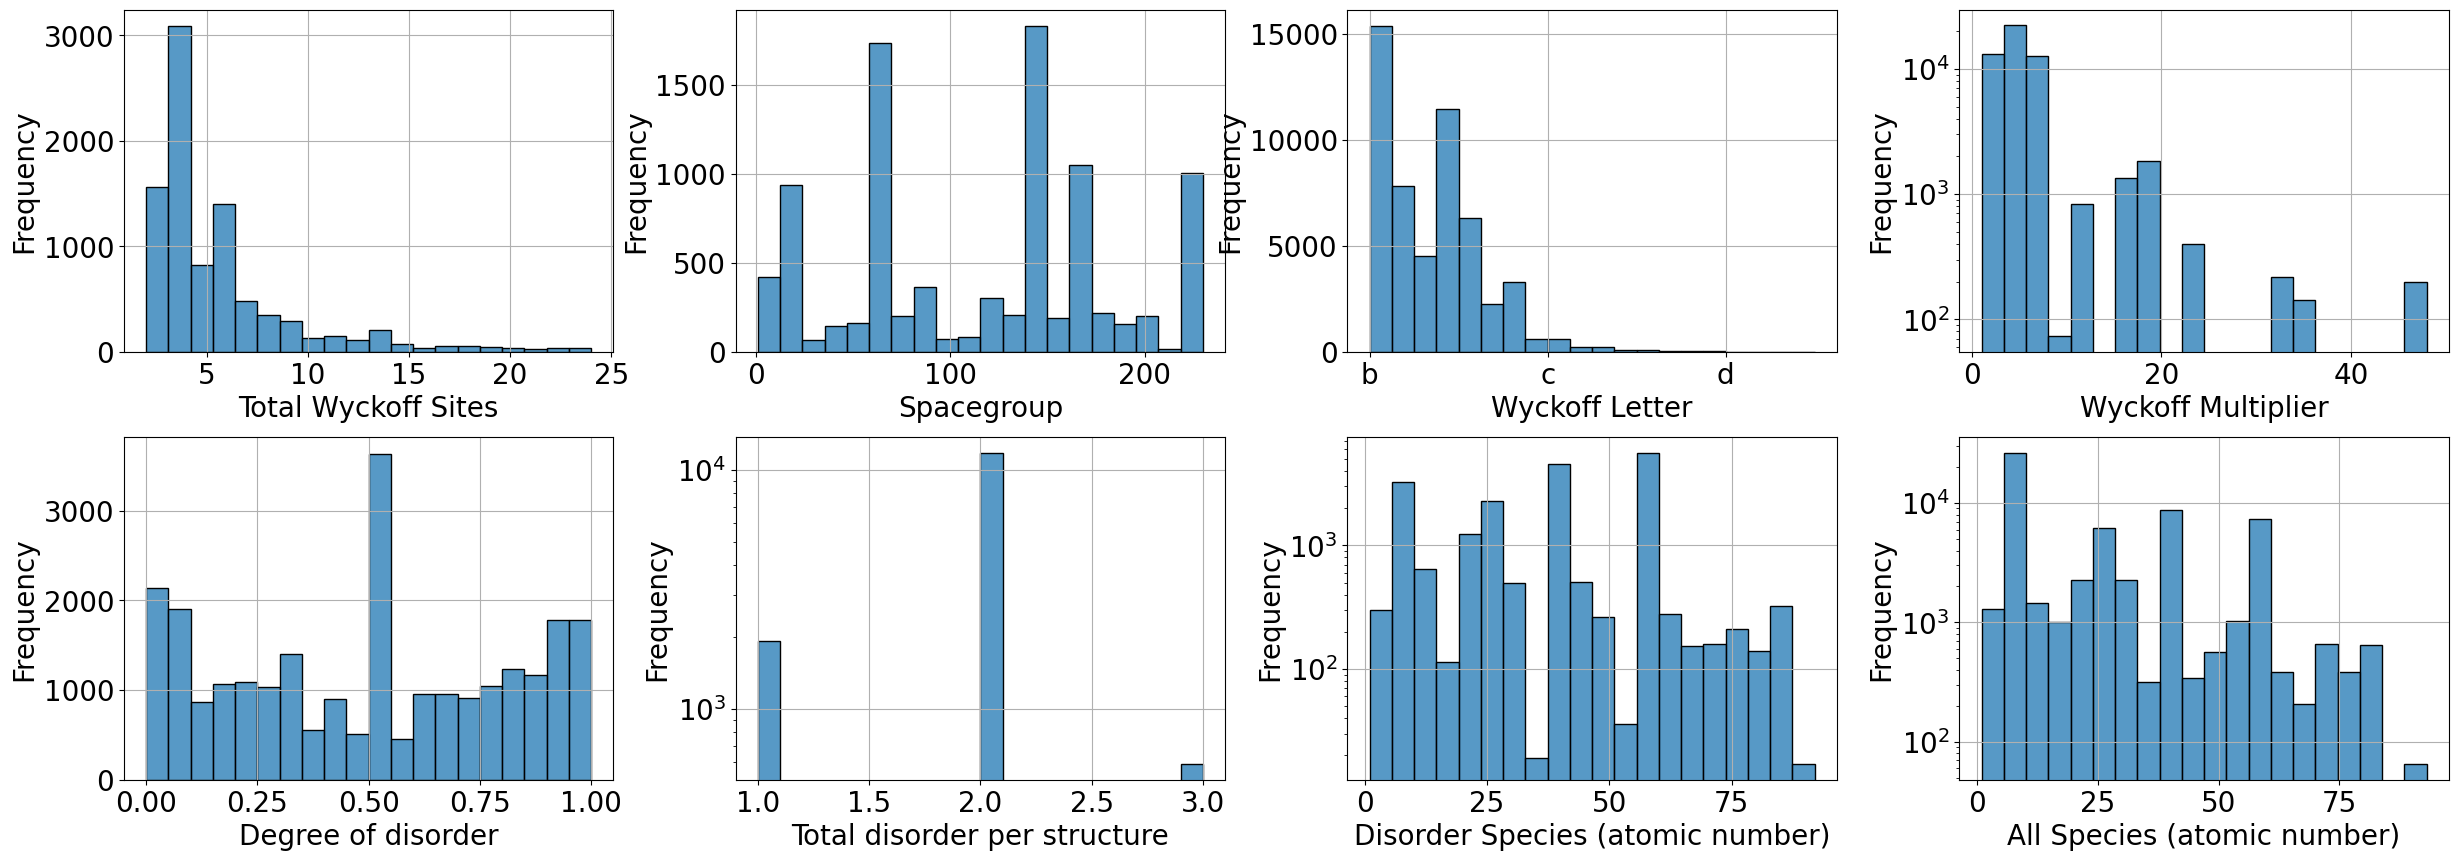

In [105]:
### Plot the representation
total_wyckoff_dict = crystal_rep.total_wyckoff_dict
total_lattice = crystal_rep.total_crystal_features
total_atomistic = crystal_rep.total_atomistic_features
print('Total Structures:',len(total_wyckoff_dict))
print('Total Lattice Features:',total_lattice.shape)
print('Total Atomistic Features:',total_atomistic.shape)

space_group = np.array(crystal_rep.spacegroup_list)
total_wyckoff_sites = []
wyckoff_sites = []
wyckoff_multipliers = []
disorder = []
disorder_species = []
total_disorder = []
all_species = []


for idx, wyckoff_dict in enumerate(total_wyckoff_dict):
    total_wyckoff_sites.append(len(wyckoff_dict))
    site_disorder =False
    
    for key in wyckoff_dict:
        wyckoff =wyckoff_dict[key]['wyckoff']
        site_num = ord(re.sub('[^a-zA-Z]+', '',wyckoff )) - 97 
        wyckoff_sites.append(site_num)
        wyckoff_multipliers.append(int(wyckoff[:-1]))

        species = wyckoff_dict[key]['species']
        
        Z_species = wyckoff_dict[key]['Z_species']
        all_species.append(Z_species)

        if len(species) > 1:
            site_disorder = True
            total_disorder.append(len(species))
            for elem,occ in species.items():
                disorder.append(occ)
            disorder_species.append(Z_species)
    
    if not site_disorder:
        total_disorder.append(1)

# Plot the distribution of the wyckoff sites
fig, ax = plt.subplots(2,4,figsize=(30,10),gridspec_kw={'wspace':0.25,'hspace':0.25})
font_size = 20
Nbins = 20

sns.histplot(total_wyckoff_sites,bins=Nbins,ax=ax[0,0])
#ax[0,0].hist(total_wyckoff_sites,bins=Nbins)
ax[0,0].set_xlabel('Total Wyckoff Sites',fontsize=font_size)
ax[0,0].set_ylabel('Frequency',fontsize=font_size)
ax[0,0].tick_params(axis='both', which='major', labelsize=font_size)
ax[0,0].tick_params(axis='both', which='minor', labelsize=font_size)
ax[0,0].grid(True)

sns.histplot(space_group,bins=Nbins,ax=ax[0,1])
#ax[0,1].hist(space_group,bins=Nbins)
ax[0,1].set_xlabel('Spacegroup',fontsize=font_size)
ax[0,1].set_ylabel('Frequency',fontsize=font_size)
ax[0,1].tick_params(axis='both', which='major', labelsize=font_size)
ax[0,1].tick_params(axis='both', which='minor', labelsize=font_size)
ax[0,1].grid(True)

sns.histplot(wyckoff_sites,bins=Nbins,ax=ax[0,2])
#ax[0,2].hist(wyckoff_sites,bins=Nbins)
ax[0,2].set_xlabel('Wyckoff Letter',fontsize=font_size)
ax[0,2].set_ylabel('Frequency',fontsize=font_size)
ax[0,2].tick_params(axis='both', which='major', labelsize=font_size)
ax[0,2].tick_params(axis='both', which='minor', labelsize=font_size)
ax[0,2].grid(True)
# map the wyckoff letter to the actual letter
wyckoff_label = {i:chr(i+97) for i in range(26)}
ax[0,2].set_xticklabels([wyckoff_label[i] for i in range(26)])

sns.histplot(wyckoff_multipliers,bins=Nbins,ax=ax[0,3])
#ax[0,3].hist(wyckoff_multipliers,bins=Nbins)
ax[0,3].set_xlabel('Wyckoff Multiplier',fontsize=font_size)
ax[0,3].set_ylabel('Frequency',fontsize=font_size)
ax[0,3].tick_params(axis='both', which='major', labelsize=font_size)
ax[0,3].tick_params(axis='both', which='minor', labelsize=font_size)
ax[0,3].grid(True)
ax[0,3].set_yscale('log')

sns.histplot(disorder,bins=Nbins,ax=ax[1,0])
#ax[1,0].hist(disorder,bins=Nbins)
ax[1,0].set_xlabel('Degree of disorder',fontsize=font_size)
ax[1,0].set_ylabel('Frequency',fontsize=font_size)
ax[1,0].tick_params(axis='both', which='major', labelsize=font_size)
ax[1,0].tick_params(axis='both', which='minor', labelsize=font_size)
ax[1,0].grid(True)

sns.histplot(total_disorder,bins=Nbins,ax=ax[1,1])
ax[1,1].set_xlabel('Total disorder per structure',fontsize=font_size)
ax[1,1].set_ylabel('Frequency',fontsize=font_size)
ax[1,1].tick_params(axis='both', which='major', labelsize=font_size)
ax[1,1].tick_params(axis='both', which='minor', labelsize=font_size)
ax[1,1].grid(True)
ax[1,1].set_yscale('log')

disorder_species = np.concatenate((disorder_species))
sns.histplot(disorder_species,bins=Nbins,ax=ax[1,2])
#ax[1,2].hist(disorder_species,bins=Nbins)
ax[1,2].set_xlabel('Disorder Species (atomic number)',fontsize=font_size)
ax[1,2].set_ylabel('Frequency',fontsize=font_size)
ax[1,2].tick_params(axis='both', which='major', labelsize=font_size)
ax[1,2].tick_params(axis='both', which='minor', labelsize=font_size)
ax[1,2].grid(True)
ax[1,2].set_yscale('log')

all_species = np.concatenate((all_species))
sns.histplot(all_species,bins=Nbins,ax=ax[1,3])
#ax[1,3].hist(all_species,bins=Nbins)
ax[1,3].set_xlabel('All Species (atomic number)',fontsize=font_size)
ax[1,3].set_ylabel('Frequency',fontsize=font_size)
ax[1,3].tick_params(axis='both', which='major', labelsize=font_size)
ax[1,3].tick_params(axis='both', which='minor', labelsize=font_size)
ax[1,3].grid(True)
ax[1,3].set_yscale('log')

### Representation learning

In [106]:
print('Total crystal features:',crystal_rep.total_crystal_features.shape)
print('Total number of structures:',print_value.shape[0])
print('Total atomic representation:',print_value.shape)
print('One hot:',print_value[:,:,:101].shape)
print('Frac. coordiante:',print_value[:,:,-30:-27].shape)
print('Wyckoff multiplier:',print_value[:,:,-27:].shape)

Total crystal features: (9017, 236)
Total number of structures: 9017
Total atomic representation: (9017, 24, 182)
One hot: (9017, 24, 101)
Frac. coordiante: (9017, 24, 3)
Wyckoff multiplier: (9017, 24, 27)


### PyTorch


In [108]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torch.optim import Adam
import math
from tqdm import tqdm
test_size = 0.2
val_size = 0.1
batch_size = 32
lr = 0.0001
epochs = 10
log_step = 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


#X = crystal_rep.total_atomistic_features
#Y = crystal_rep.total_crystal_features
#np.save('X_2D.npy',X)
#np.save('Y_2D.npy',Y)
X = np.load('X_2D.npy')
Y = np.load('Y_2D.npy')

print('X:',X.shape)
print('Y:',Y.shape)

# Setup scaler for Y
scaler_Y = StandardScaler()
Y_scaled = Y.copy()
Y_scaled[:,:6] = scaler_Y.fit_transform(Y[:,:6])
# Set X and Y to torch tensors
Y = Y_scaled

x_train_val,x_test,y_train_val,y_test=train_test_split( X \
                                               ,Y,test_size=test_size)
x_train,x_val,y_train,y_val = train_test_split(x_train_val,y_train_val,test_size=val_size)
print('Train:',x_train.shape,y_train.shape)
print('Val:',x_val.shape,y_val.shape)
print('Test:',x_test.shape,y_test.shape)

# 2. Define a custom Dataset class
class CrystalDataset(Dataset):
    def __init__(self, X, Y):
        """
        Initialize the dataset.
        
        Args:
        X (numpy array): Atomic features with shape (N, feature_dim, wyckoff_dim).
        Y (numpy array): Crystal features with shape (N, crystal_dim).
        """
        self.X = torch.tensor(X, dtype=torch.float32)
        self.Y = torch.tensor(Y, dtype=torch.float32)

    def __len__(self):
        """
        Return the size of the dataset.
        """
        return len(self.X)

    def __getitem__(self, idx):
        """
        Retrieve an item at the specified index.
        
        Args:
        idx (int): Index of the item.
        
        Returns:
        Tuple[Tensor, Tensor]: Atomic and crystal features.
        """
        return self.X[idx], self.Y[idx]

# 3. Create Dataset and DataLoader for each split
train_dataset = CrystalDataset(x_train, y_train)
val_dataset = CrystalDataset(x_val, y_val)
#test_dataset = CrystalDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
#test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

X: (9017, 24, 182)
Y: (9017, 236)
Train: (6491, 24, 182) (6491, 236)
Val: (722, 24, 182) (722, 236)
Test: (1804, 24, 182) (1804, 236)


In [109]:
# Example usage: Iterate through the train_loader
for batch_idx, (x_batch, y_batch) in enumerate(train_loader):
    print(f"Batch {batch_idx + 1}")
    print(f"x_batch shape: {x_batch.shape}")  # Shape: (batch_size, 131, 24)
    print(f"y_batch shape: {y_batch.shape}")  # Shape: (batch_size, 236)
    break

Batch 1
x_batch shape: torch.Size([32, 24, 182])
y_batch shape: torch.Size([32, 236])


In [112]:
# Define the VAE model
class VAE(nn.Module):
    def __init__(self, feature_dim, wyckoff_dim, crystal_dim,space_group_dim=230,lattice_dim=6,
                  stride= [2,2,1],kernel=[3,3,4],latent_dim=256, max_filter=64,verbose=False):
        super(VAE, self).__init__()
        self.feature_dim = feature_dim
        self.wyckoff_dim = wyckoff_dim
        self.crystal_dim = crystal_dim
        self.space_group_dim = space_group_dim
        self.stride = stride
        self.kernel_size = kernel
        self.latent_dim = latent_dim
        self.max_filter = max_filter
        self.verbose = verbose
        self.map_size = int(feature_dim / stride[0] / stride[1] / stride[2])

        # Encoder: Atomic features
        self.encoder_conv1 = nn.Conv1d(wyckoff_dim, max_filter * 2 , kernel_size=self.kernel_size[0], stride=self.stride[0], padding=0)
        self.encoder_conv2 = nn.Conv1d(max_filter * 2, max_filter * 4, kernel_size=self.kernel_size[1], stride=self.stride[1], padding=0)
        self.encoder_conv3 = nn.Conv1d(max_filter * 4, max_filter * 8, kernel_size=self.kernel_size[2], stride=self.stride[2], padding=0)

        self.encoder_bn1 = nn.BatchNorm1d(max_filter * 2)
        self.encoder_bn2 = nn.BatchNorm1d(max_filter * 4)
        self.encoder_bn3 = nn.BatchNorm1d(max_filter * 8)
        self.encoder_fc = nn.Linear(max_filter * 8 * (self.map_size) , 1024) #### TODO: NEED TO CHANGE THIS TO BE DYNAMIC

        # Encoder: Crystal features
        self.crystal_fc1 = nn.Linear(crystal_dim, 256)
        self.crystal_fc2 = nn.Linear(256, 128)

        # Latent space
        self.z_mean = nn.Linear(1024 + 128, latent_dim)
        self.z_log_var = nn.Linear(1024 + 128, latent_dim)

        # Decoder: Crystal features
        self.decoder_crystal_fc = nn.Linear(latent_dim, crystal_dim)
        self.decoder_sg = nn.Linear(crystal_dim, space_group_dim)  # 230 space groups
        self.decoder_lattice = nn.Linear(crystal_dim, lattice_dim) # 6 lattice constants and angles

        # Decoder: Atomistic features
        self.last_encoder_layer = self.encoder_conv3.state_dict()['weight'].shape[0]

        self.decoder_fc = nn.Linear(latent_dim, self.last_encoder_layer * self.map_size)
        self.decoder_conv1 = nn.ConvTranspose1d(self.last_encoder_layer, max_filter * 4, kernel_size=self.kernel_size[2], stride=self.stride[2])
        self.decoder_conv2 = nn.ConvTranspose1d(max_filter *4 , max_filter * 2 , kernel_size=self.kernel_size[1], stride=self.stride[1],)
        self.decoder_conv3 = nn.ConvTranspose1d(max_filter * 2, wyckoff_dim, kernel_size=self.kernel_size[0], stride=self.stride[0],)
        self.decoder_bn1 = nn.BatchNorm1d(max_filter * 4)
        self.decoder_bn2 = nn.BatchNorm1d(max_filter * 2)
        self.decoder_bn3 = nn.BatchNorm1d(wyckoff_dim)

        self.element = nn.Linear(feature_dim,101)
        self.wycokff_letter = nn.Linear(feature_dim,27)
        self.wyckoff_multiplier = nn.Linear(feature_dim,51)
        self.frac_coords = nn.Linear(feature_dim,3)

    def encode(self, x, x2):
        # Atomic feature encoding
        if self.verbose:
            print('X:',x.shape)
            print('X2:',x2.shape)
        #x = x.permute(0, 2, 1)
        #print(x.shape,x2.shape)
        en0 = F.relu(self.encoder_bn1(self.encoder_conv1(x)))
        if self.verbose: print('En0:',en0.shape)     
        en1 = F.relu(self.encoder_bn2(self.encoder_conv2(en0)))
        if self.verbose: print('En1:',en1.shape)
        en2 = F.relu(self.encoder_bn3(self.encoder_conv3(en1)))
        if self.verbose: print('En2:',en2.shape)
        en3 = en2.view(en2.size(0), -1)  # Flatten
        if self.verbose: print('En3:',en3.shape)

        # Get the map size
        self.map_size = en2.shape[-1]

        en4 = F.relu(self.encoder_fc(en3))
        if self.verbose: print('En4:',en4.shape)
        if self.verbose: print('---------------------------------')

        # Crystal feature encoding

        cry0 = F.relu(self.crystal_fc1(x2))
        if self.verbose: print('Cry0:',cry0.shape)
        cry1 = F.relu(self.crystal_fc2(cry0))
        if self.verbose: print('Cry1:',cry1.shape)
        if self.verbose: print('---------------------------------')

        # Combine atomic and crystal features
        latent = torch.cat((en4, cry1), dim=1)
        z_mean = self.z_mean(latent)
        z_log_var = self.z_log_var(latent)

        if self.verbose:
            print('Latent indput',latent.shape)
            print('Z mean',z_mean.shape,'Z_std',z_log_var.shape)
            print('---------------------------------')

        return z_mean, z_log_var

    def sampling(self, z_mean, z_log_var):
        std = torch.exp(0.5 * z_log_var)
        eps = torch.randn_like(std)
        return z_mean + eps * std

    def decode(self, z):
        # Decode crystal features
        # Note for features with cross entropy loss, we do not apply softmax activation (ref: https://stackoverflow.com/questions/55675345/should-i-use-softmax-as-output-when-using-cross-entropy-loss-in-pytorch)
        if self.verbose:
            print('Z:',z.shape)

        crystal_features = F.relu(self.decoder_crystal_fc(z))
        decoded_sg = self.decoder_sg(crystal_features)
        decoded_lattice = self.decoder_lattice(crystal_features)


        if self.verbose:
            print('Crystal Features:',crystal_features.shape)
            print('Decoded SG:',decoded_sg.shape)
            print('Decoded Lattice:',decoded_lattice.shape)
            print('---------------------------------')

        # Decode atomistic features
        dec0 = self.decoder_fc(z)
        if self.verbose: print('Dec0:',dec0.shape)
        dec1 = dec0.view(dec0.size(0), self.last_encoder_layer ,self.map_size)
        if self.verbose: print('Dec1:',dec1.shape)
        dec2 = F.relu(self.decoder_bn1(self.decoder_conv1(dec1)))
        if self.verbose: print('Dec2:',dec2.shape)
        dec3 = F.relu(self.decoder_bn2(self.decoder_conv2(dec2)))
        if self.verbose: print('Dec3:',dec3.shape)

        dec4= F.relu(self.decoder_bn3(self.decoder_conv3(dec3)))
        if self.verbose: print('Dec4:',dec4.shape)

        # Separate the atomistic features. 
        decoded_element = F.softmax(self.element(dec4),dim=2)
        if self.verbose: print('Element:',decoded_element.shape)
        decoded_wyckoff_multiplier = self.wyckoff_multiplier(dec4)
        if self.verbose: print('Wyckoff Multiplier:',decoded_wyckoff_multiplier.shape)
        decoded_frac_coords = self.frac_coords(dec4)
        if self.verbose: print('Frac Coords:',decoded_frac_coords.shape)
        decoded_wyckoff_letter =self.wycokff_letter(dec4)
        if self.verbose: print('Wyckoff Letter:',decoded_wyckoff_letter.shape)
        
        
        return decoded_element,decoded_wyckoff_multiplier,decoded_frac_coords,decoded_wyckoff_letter, decoded_sg, decoded_lattice

    def forward(self, x, x2):
        # Encode
        z_mean, z_log_var = self.encode(x, x2)
        # Latent space sampling
        z = self.sampling(z_mean, z_log_var)
        # Decode
        decoded_element,decoded_wyckoff_multiplier,decoded_frac_coords,decoded_wyckoff_letter, decoded_sg, decoded_lattice = self.decode(z)
        outputs = {'decoded_element':decoded_element,
                    'decoded_wyckoff_multiplier':decoded_wyckoff_multiplier,
                    'decoded_frac_coords':decoded_frac_coords,
                    'decoded_wyckoff_letter':decoded_wyckoff_letter,
                   'decoded_sg':decoded_sg,
                   'decoded_lattice':decoded_lattice,
                   'z_mean':z_mean,
                   'z_log_var':z_log_var}
        return outputs

# Initialize the VAE
feature_dim = X.shape[2]
wyckoff_dim = X.shape[1]
crystal_dim = Y.shape[1]
kernel = [4,3,2]
stride = [2,3,2]
max_filter = 32
latent_dim = 256

vae = VAE(feature_dim, wyckoff_dim, crystal_dim,verbose=True,kernel=kernel,
          stride=stride,max_filter=max_filter,latent_dim=latent_dim)
# Test the forward pass
x_batch, y_batch = next(iter(train_loader))
out = vae(x_batch, y_batch)

# NOTE: Kernel add an extra dimension for the wyckoff sites 
#from torchsummary import summary1
#summary(vae, [(feature_dim,wyckoff_dim),(crystal_dim,)],)

X: torch.Size([32, 24, 182])
X2: torch.Size([32, 236])
En0: torch.Size([32, 64, 90])
En1: torch.Size([32, 128, 30])
En2: torch.Size([32, 256, 15])
En3: torch.Size([32, 3840])
En4: torch.Size([32, 1024])
---------------------------------
Cry0: torch.Size([32, 256])
Cry1: torch.Size([32, 128])
---------------------------------
Latent indput torch.Size([32, 1152])
Z mean torch.Size([32, 256]) Z_std torch.Size([32, 256])
---------------------------------
Z: torch.Size([32, 256])
Crystal Features: torch.Size([32, 236])
Decoded SG: torch.Size([32, 230])
Decoded Lattice: torch.Size([32, 6])
---------------------------------
Dec0: torch.Size([32, 3840])
Dec1: torch.Size([32, 256, 15])
Dec2: torch.Size([32, 128, 30])
Dec3: torch.Size([32, 64, 90])
Dec4: torch.Size([32, 24, 182])
Element: torch.Size([32, 24, 101])
Wyckoff Multiplier: torch.Size([32, 24, 51])
Frac Coords: torch.Size([32, 24, 3])
Wyckoff Letter: torch.Size([32, 24, 27])


In [113]:

# Defien loss function and test it
# Define the VAE loss function
def vae_loss_function(model_output, x, y, coeffs,verbose=False):
    """
    Compute the VAE loss.

    Args:
    reconstructed_x (Tensor): Reconstructed output from the decoder.
    x (Tensor): Original input.
    z_mean (Tensor): Mean of the latent variable.
    z_log_var (Tensor): Log variance of the latent variable.
    coeffs (dict): Coefficients for different loss components.

    Returns:
    Tensor: Total loss (scalar).
    """   
    # VAE loss consists of two components: 
    # 1. KL divergence loss. That is a measure of divergence between two distributions.
    # 2. Reconstruction loss for the atoms. That we will seperate into several lossed for each component we want to reconstruct
    # 3. Reconstruction loss for the crystal features
    # We want to minimize the reconstruction loss and the KL divergence loss.
    # Mean over the batch to make the training independent of the batch size.

    # Initialize the losses
    losses = {}

    # Get the model output
    z_mean = model_output['z_mean']
    z_log_var = model_output['z_log_var']
    decoded_sg = model_output['decoded_sg']
    decoded_lattice = model_output['decoded_lattice']

    # Get the decoded atomistic features
    decoded_element = model_output['decoded_element']
    decoded_wyckoff_multiplier = model_output['decoded_wyckoff_multiplier']
    decoded_frac_coords = model_output['decoded_frac_coords']
    decoded_wyckoff_letter = model_output['decoded_wyckoff_letter']

    if verbose:
        print('Original:',x.shape)
        print('Reconstructed:',decoded_element.shape,decoded_wyckoff_multiplier.shape,decoded_frac_coords.shape,decoded_wyckoff_letter.shape)
        print('Z mean:',z_mean.shape)
        print('Z log var:',z_log_var.shape)
        print('Coeffs:',coeffs)
        print('---------------------------------')
    
    #### KL Divergence loss ####
    kl_loss_i = (1 + z_log_var - torch.square(z_mean) - torch.exp(z_log_var))
    kl_loss = torch.mean( -0.5 * (1/z_mean.shape[1]) * torch.sum(kl_loss_i, dim=1) ) # sum over the latent dimensions and mean over the batch
    #losses['kl'] = kl_loss
    if verbose:
        print('KL Loss i:',kl_loss_i.shape)
        print('KL Loss:',kl_loss.shape)

    #### Reconstruction loss atomistic features ####
    #if verbose:
    #    if decoded_element[0,0,:].sum() < 1 or decoded_element[0,0,:].sum() > 1:
    #        print('ERROR Element:',decoded_element[0,0,:].sum())
    
    # Loop over wyckoff sites
    element_loss_i = []
    wyckoff_site_loss_i = []
    wyckoff_multiplier_loss_i = []
    for i in range(decoded_element.shape[1]):
        # Reconstruction loss of the elemental features
        # Use KL div loss to predict the prob. distribution (ref: https://discuss.pytorch.org/t/loss-function-for-predicting-a-distribution/156681)
        element_loss_i.append(torch.mean(torch.square(decoded_element[:,i,:] - x[:,i,:101]),dim=1)) # MSE between the softmax distribution and the true distribution
        #element_loss_i.append(torch.sum(F.kl_div(F.log_softmax(decoded_element[:,i,:],dim=1), x[:,i,:101],reduction='none'),dim=1)) # KL divergence loss with sum reduction

        # Wyckoff sites reconstruction loss. Cross entropy loss
        wyckoff_site_loss_i.append(F.cross_entropy(decoded_wyckoff_letter[:,i,:], x[:,i,-27:],reduction='none'))
        #wyckoff_site_loss_i.append(torch.mean(torch.square(decoded_wyckoff_letter[:,i,:], x[:,i,-27:]),dim=1)) # MSE between the softmax distribution and the true distribution)
        #wyckoff_site_loss_i.append(torch.square(torch.argmax(decoded_wyckoff_letter[:,i,:],dim=1) - torch.argmax(x[:,i,-27:],dim=1) ) ) # MSE between the softmax distribution and the true distribution)


        # Wyckoof multiplier loss. Cross entropy loss
        wyckoff_multiplier_loss_i.append(F.cross_entropy(decoded_wyckoff_multiplier[:,i,:], x[:,i,101:-30],reduction='none',))
    # Element loss
    element_loss_i = torch.stack(element_loss_i)
    element_loss = torch.mean(torch.sum(element_loss_i,dim=0)) # sum over the wyckoff_sites and mean over the batch
    losses['element'] = element_loss
    if verbose:
        print('Element Loss i:',element_loss_i.shape)
        print('Element Loss:',element_loss.shape)

    # Wyckoff sites reconstruction loss. Cross entropy loss
    wyckoff_site_loss_i = torch.stack(wyckoff_site_loss_i)
    wyckoff_site_loss = torch.mean(torch.sum(wyckoff_site_loss_i,dim=0,dtype=torch.float64)) # sum over the wyckoff sites and mean over the batch
    losses['wyckoff_letter'] = wyckoff_site_loss
    if verbose:
        print('Wyckoff Loss i:',wyckoff_site_loss_i.shape)
        print('Wyckoff Loss:',wyckoff_site_loss.shape)

    # Wyckoof multiplier loss. Cross entropy loss
    wyckoff_multiplier_loss_i = torch.stack(wyckoff_multiplier_loss_i)
    wyckoff_multiplier_loss = torch.mean(torch.sum(wyckoff_multiplier_loss_i,dim=0)) # sum over the wyckoff sites and mean over the batch
    losses['wyckoff_multiplier'] = wyckoff_multiplier_loss
    if verbose:
        print('Wyckoff Multiplier Loss i:',wyckoff_multiplier_loss_i.shape)
        print('Wyckoff Multiplier Loss:',wyckoff_multiplier_loss.shape)
    
    # Fractional coordinates reconstruction loss. Mean squared error loss
    frac_coords_loss_i = torch.mean(torch.square(decoded_frac_coords - x[:,:,-30:-27]),dim=2) # mse over the wyckoff sites 
    frac_coords_loss_j = torch.sum(frac_coords_loss_i,dim=1) # sum over the fractional coordinates
    frac_coords_loss = torch.mean(frac_coords_loss_j) # mean over the batch
    losses['frac_coords'] = frac_coords_loss
    if verbose:
        print('Frac Coords Loss i:',frac_coords_loss_i.shape)
        print('Frac Coords Loss:',frac_coords_loss.shape)

    #### Reconstruction loss crystal features ####
    # Space group loss. Cross entropy loss
    space_group_loss_i = F.cross_entropy(decoded_sg, y[:,6:],reduce=False)
    space_group_loss = torch.mean(space_group_loss_i) # mean over the batch
    losses['space_group'] = space_group_loss
    if verbose:
        print('Space Group Loss i:',space_group_loss_i.shape)
        print('Space Group Loss:',space_group_loss.shape)

    # Lattice loss. Mean squared error loss
    lattice_loss_i = F.mse_loss(decoded_lattice, y[:,:6],reduce=False)
    lattice_loss = torch.mean(torch.sum(lattice_loss_i,dim=1)) # sum over the lattice constants and mean over the batch
    losses['lattice'] = lattice_loss
    if verbose:
        print('Lattice Loss i:',lattice_loss_i.shape)
        print('Lattice Loss:',lattice_loss.shape)

    # Weighted sum of losses
    for key in losses:
        losses[key] *= coeffs[key]

    # Total loss
    total_loss = torch.sum(torch.stack(list(losses.values()))) # Take all the losses and make them to a list of torch objects then stack them to make them a tensor and sum them
    losses['total'] = total_loss
    if verbose:
        print('Total Loss:',total_loss.shape)
        print('---------------------------------')

    return losses
coeffs = {'kl': 1000.0,
          'element':200.0,
          'wyckoff_letter': 1.0,
        'wyckoff_multiplier': 1.0,
          'frac_coords': 1.0,
          'space_group':10.0,
          'lattice':3.0}
# Forward pass
vae = VAE(feature_dim, wyckoff_dim, crystal_dim,verbose=False,kernel=kernel,stride=stride)
out = vae(x_batch, y_batch)

# Compute loss
loss = vae_loss_function(out, x_batch, y_batch, coeffs,verbose=True);
for key in loss:
    print(f"{key}: {loss[key]}")

Original: torch.Size([32, 24, 182])
Reconstructed: torch.Size([32, 24, 101]) torch.Size([32, 24, 51]) torch.Size([32, 24, 3]) torch.Size([32, 24, 27])
Z mean: torch.Size([32, 256])
Z log var: torch.Size([32, 256])
Coeffs: {'kl': 1000.0, 'element': 200.0, 'wyckoff_letter': 1.0, 'wyckoff_multiplier': 1.0, 'frac_coords': 1.0, 'space_group': 10.0, 'lattice': 3.0}
---------------------------------
KL Loss i: torch.Size([32, 256])
KL Loss: torch.Size([])
Element Loss i: torch.Size([24, 32])
Element Loss: torch.Size([])
Wyckoff Loss i: torch.Size([24, 32])
Wyckoff Loss: torch.Size([])
Wyckoff Multiplier Loss i: torch.Size([24, 32])
Wyckoff Multiplier Loss: torch.Size([])
Frac Coords Loss i: torch.Size([32, 24])
Frac Coords Loss: torch.Size([])
Space Group Loss i: torch.Size([32])
Space Group Loss: torch.Size([])
Lattice Loss i: torch.Size([32, 6])
Lattice Loss: torch.Size([])
Total Loss: torch.Size([])
---------------------------------
element: 46.458648681640625
wyckoff_letter: 76.9102401137

In [154]:
out.keys()

dict_keys(['decoded_element', 'decoded_wyckoff_multiplier', 'decoded_frac_coords', 'decoded_wyckoff_letter', 'decoded_sg', 'decoded_lattice', 'z_mean', 'z_log_var'])

In [114]:
# Training loop
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#log_step = 1
#epochs = 50
#lr = 0.001
# Initialize the VAE
feature_dim = X.shape[2]
wyckoff_dim = X.shape[1]

crystal_dim = Y.shape[1]
vae = VAE(feature_dim, wyckoff_dim, crystal_dim,verbose=False,kernel=kernel,stride=stride)
vae.to(device)

optimizer = Adam(vae.parameters(), lr=lr)

# Initialize the train and validation loss
train_loss_dict = {}
train_loss_dict['total'] = []
train_loss_dict['epoch'] = []

val_loss_dict = {}
val_loss_dict['total'] = []
val_loss_dict['epoch'] = []

best_val_loss = np.inf

# Training loop
for epoch in tqdm(range(epochs)):
    vae.train()
    # Initialize the train loss
    train_loss = 0.0
    train_running_loss = {}

    # Loop through the train loader
    for x_batch, y_batch in train_loader:  # Use both datasets if required
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()

        # Forward pass
        out = vae(x_batch, y_batch)
        
        # Compute loss
        loss = vae_loss_function(out, x_batch, y_batch, coeffs)
        # Backward pass
        loss['total'].backward()
        optimizer.step()

        # Log batch results
        train_loss += loss['total'].item()
        # Log running loss for each component of the loss
        if len(train_running_loss) == 0:
            train_running_loss = loss
        else:
            for key in loss:
                train_running_loss[key] += loss[key]

    print(f"Epoch {epoch + 1}/{epochs}: Train Loss: {train_loss / len(train_loader)}")
    
    # Save the train loss for each component of the loss as a mean over the batches
    for key in train_running_loss:
        if key not in train_loss_dict:
            train_loss_dict[key] = [train_running_loss[key].item() / len(train_loader)]
        else:
            train_loss_dict[key].append(train_running_loss[key].item() / len(train_loader))
    train_loss_dict['epoch'].append(epoch)
    
    # Validate and save model for each log step
    if (epoch + 1) % log_step == 0:
        vae.eval()
        val_loss = 0.0
        val_running_loss = {}
        with torch.no_grad():
            for x_val, y_val in val_loader:
                x_val, y_val = x_val.to(device), y_val.to(device)
                # Forward pass
                out_val = vae(x_val, y_val)
                
                # Compute loss
                loss_val = vae_loss_function(out_val, x_val, y_val,coeffs)

                # Log batch results for validation 
                if len(val_running_loss) == 0:
                    val_running_loss = loss_val
                else:
                    for key in loss_val:
                        val_running_loss[key] += loss_val[key]
        # Log epoch results
        print('---------------------------------')
        print(f"Validation Loss:")
        
        for key in val_running_loss:
            # Print all losses
            print(f"{key}: {val_running_loss[key].item()/len(val_loader)}")
            # Save the validation loss
            if key not in val_loss_dict:
                val_loss_dict[key] = [val_running_loss[key].item()/len(val_loader)]
            else:
                val_loss_dict[key].append(val_running_loss[key].item()/len(val_loader))
        val_loss_dict['epoch'].append(epoch)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10: Train Loss: 124.24208412444054


 10%|█         | 1/10 [00:32<04:48, 32.10s/it]

---------------------------------
Validation Loss:
element: 10.256329743758492
wyckoff_letter: 15.79978380692169
wyckoff_multiplier: 15.345733642578125
frac_coords: 0.5973355251809825
space_group: 11.584507154381793
lattice: 7.14362965459409
total: 60.72732069748026
Epoch 2/10: Train Loss: 43.248963206786534


 20%|██        | 2/10 [01:03<04:15, 31.95s/it]

---------------------------------
Validation Loss:
element: 5.472961757494056
wyckoff_letter: 9.032895702338363
wyckoff_multiplier: 6.8578948974609375
frac_coords: 0.48109552134638245
space_group: 5.804669587508492
lattice: 3.721856822138247
total: 31.37137417685171
Epoch 3/10: Train Loss: 24.838603652264215


 30%|███       | 3/10 [01:35<03:42, 31.81s/it]

---------------------------------
Validation Loss:
element: 4.419393788213315
wyckoff_letter: 6.292947587801848
wyckoff_multiplier: 4.290648750636889
frac_coords: 0.4317986032237177
space_group: 3.713154004967731
lattice: 1.439520794412364
total: 20.587462995405566
Epoch 4/10: Train Loss: 17.16695840749595


 40%|████      | 4/10 [02:07<03:10, 31.73s/it]

---------------------------------
Validation Loss:
element: 3.938034721042799
wyckoff_letter: 4.831170378692128
wyckoff_multiplier: 3.179543868355129
frac_coords: 0.40447073397429095
space_group: 2.7800501947817593
lattice: 1.0686057546864385
total: 16.20187516821662
Epoch 5/10: Train Loss: 13.181480342162018


 50%|█████     | 5/10 [02:38<02:38, 31.69s/it]

---------------------------------
Validation Loss:
element: 3.492323170537534
wyckoff_letter: 3.7578892825670436
wyckoff_multiplier: 2.3671651093856148
frac_coords: 0.3977268882419752
space_group: 2.2615983382515283
lattice: 0.7806054820185122
total: 13.057308326071716
Epoch 6/10: Train Loss: 10.492648033559389


 60%|██████    | 6/10 [03:10<02:06, 31.65s/it]

---------------------------------
Validation Loss:
element: 3.19488757589589
wyckoff_letter: 3.076531371520834
wyckoff_multiplier: 1.9330475848654043
frac_coords: 0.3678471938423488
space_group: 1.8596287602963655
lattice: 0.7585512244183085
total: 11.19049385661138
Epoch 7/10: Train Loss: 8.669711729065344


 70%|███████   | 7/10 [03:41<01:34, 31.60s/it]

---------------------------------
Validation Loss:
element: 2.9027099609375
wyckoff_letter: 2.6411676988410027
wyckoff_multiplier: 1.6242037234099016
frac_coords: 0.36409759521484375
space_group: 1.7106772713039233
lattice: 0.7025190436321757
total: 9.945375512969505
Epoch 8/10: Train Loss: 7.259127946633721


 80%|████████  | 8/10 [04:13<01:03, 31.58s/it]

---------------------------------
Validation Loss:
element: 2.739577583644701
wyckoff_letter: 2.302217777217002
wyckoff_multiplier: 1.440401491911515
frac_coords: 0.34362494427224866
space_group: 1.5818642326023267
lattice: 0.5936389591382898
total: 9.001325119009275
Epoch 9/10: Train Loss: 6.248186805445334


 90%|█████████ | 9/10 [04:44<00:31, 31.57s/it]

---------------------------------
Validation Loss:
element: 2.5133877629819126
wyckoff_letter: 2.0280750165623953
wyckoff_multiplier: 1.19854388029679
frac_coords: 0.32304197808970575
space_group: 1.6369622271993887
lattice: 0.5812722496364428
total: 8.28128289837586
Epoch 10/10: Train Loss: 5.396882848302469


100%|██████████| 10/10 [05:16<00:00, 31.65s/it]

---------------------------------
Validation Loss:
element: 2.370518394138502
wyckoff_letter: 1.8118268638067452
wyckoff_multiplier: 1.05059756403384
frac_coords: 0.3400336970453677
space_group: 1.5684074733568274
lattice: 0.5533700611280359
total: 7.694754166239843


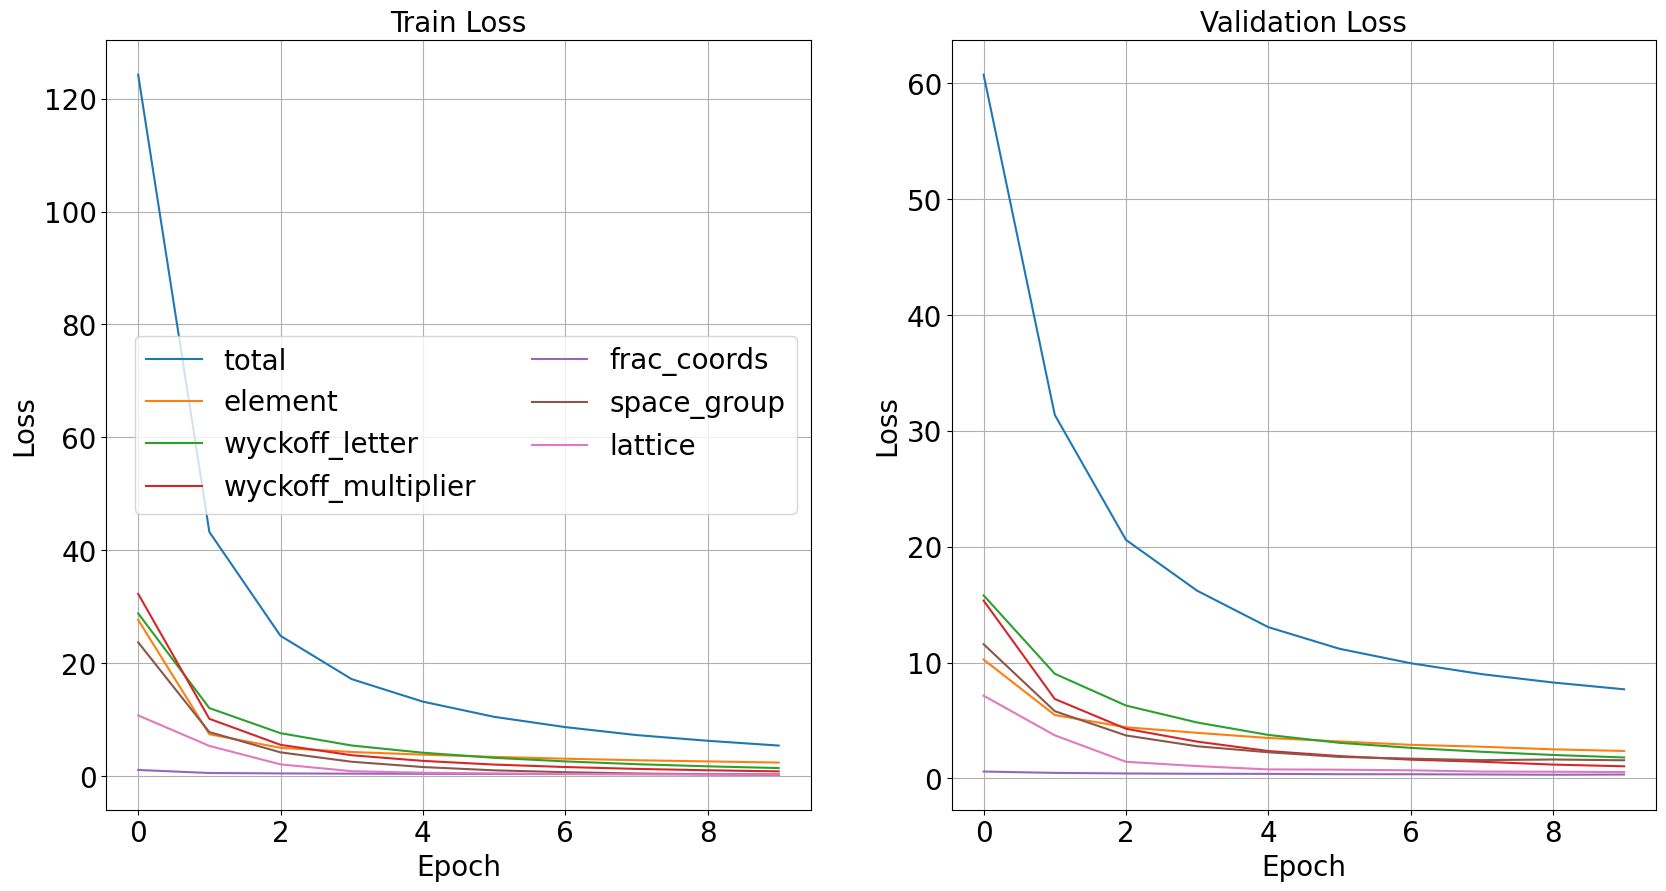

In [115]:
## Plot all the losses as a function of the epoch
fig, ax = plt.subplots(1,2,figsize=(20,10))
font_size = 20
Nbins = 20

for key in train_loss_dict:
    if key == 'epoch':
        continue
    ax[0].plot(train_loss_dict[key],label=key)
    val_epoch  = np.arange(0,len(val_loss_dict[key])*log_step,log_step)
    ax[1].plot(val_epoch, val_loss_dict[key],label=key)

ax[0].set_xlabel('Epoch',fontsize=font_size)
ax[0].set_ylabel('Loss',fontsize=font_size)
ax[0].set_title('Train Loss',fontsize=font_size)
ax[0].tick_params(axis='both', which='major', labelsize=font_size)
ax[0].tick_params(axis='both', which='minor', labelsize=font_size)
ax[0].grid(True)
ax[0].legend(fontsize=font_size,ncol=2)

ax[1].set_xlabel('Epoch',fontsize=font_size)
ax[1].set_ylabel('Loss',fontsize=font_size)
ax[1].set_title('Validation Loss',fontsize=font_size)
ax[1].tick_params(axis='both', which='major', labelsize=font_size)
ax[1].tick_params(axis='both', which='minor', labelsize=font_size)
ax[1].grid(True)
#ax[1].legend(fontsize=font_size)


In [119]:
### Test the model on the test set and plot the results


# Load the VAE model 
vae_eval = VAE(feature_dim, wyckoff_dim, crystal_dim,verbose=False,kernel=kernel,stride=stride)
vae_dict = torch.load('best_vae_model.pth',map_location=torch.device('cpu'))
vae_eval.load_state_dict(vae_dict['model'])
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
print('X:',x_test.shape)
print('Y:',y_test.shape)
out_test = vae_eval(x_test, y_test)
loss_test = vae_loss_function(out_test, x_test, y_test,coeffs)
for key in loss_test:
    # print mean loss
    print(f"{key}: {loss_test[key]/len(x_test)}")


x_test_plot = x_test.cpu().detach().numpy()
y_test_plot = y_test.cpu().detach().numpy()
vae_element = out_test['decoded_element'].cpu().detach().numpy()
vae_wyckoff_multiplier = out_test['decoded_wyckoff_multiplier'].cpu().detach().numpy()
vae_frac_coords = out_test['decoded_frac_coords'].cpu().detach().numpy()
vae_wyckoff_letter = out_test['decoded_wyckoff_letter'].cpu().detach().numpy()

vae_sg = out_test['decoded_sg'].cpu().detach().numpy()
vae_lattice = out_test['decoded_lattice'].cpu().detach().numpy()
print('X:',x_test_plot.shape)
print('Y:',y_test_plot.shape)
print('VAE element:',vae_element.shape)
print('VAE Wyckoff Multiplier:',vae_wyckoff_multiplier.shape)
print('VAE Frac Coords:',vae_frac_coords.shape)
print('VAE Wyckoff Letter:',vae_wyckoff_letter.shape)
print('VAE SG:',vae_sg.shape)
print('VAE Lattice:',vae_lattice.shape)


# Inverse transform the data
y_test_lattice = scaler_Y.inverse_transform(y_test_plot[:,:6])
y_test_sg = y_test_plot[:,6:]
vae_lattice = scaler_Y.inverse_transform(vae_lattice)


X: torch.Size([1804, 24, 182])
Y: torch.Size([1804, 236])
element: 0.0002867649309337139
wyckoff_letter: 0.0002985591959976669
wyckoff_multiplier: 0.00017767005192581564
frac_coords: 0.00012139829050283879
space_group: 0.00032582448329776525
lattice: 5.721460183849558e-05
total: 0.0012674315486723034
X: (1804, 24, 182)
Y: (1804, 236)
VAE element: (1804, 24, 101)
VAE Wyckoff Multiplier: (1804, 24, 51)
VAE Frac Coords: (1804, 24, 3)
VAE Wyckoff Letter: (1804, 24, 27)
VAE SG: (1804, 230)
VAE Lattice: (1804, 6)


(1804, 3) (1804, 3) (1804,)
(1804, 3) (1804, 3) (1804,)


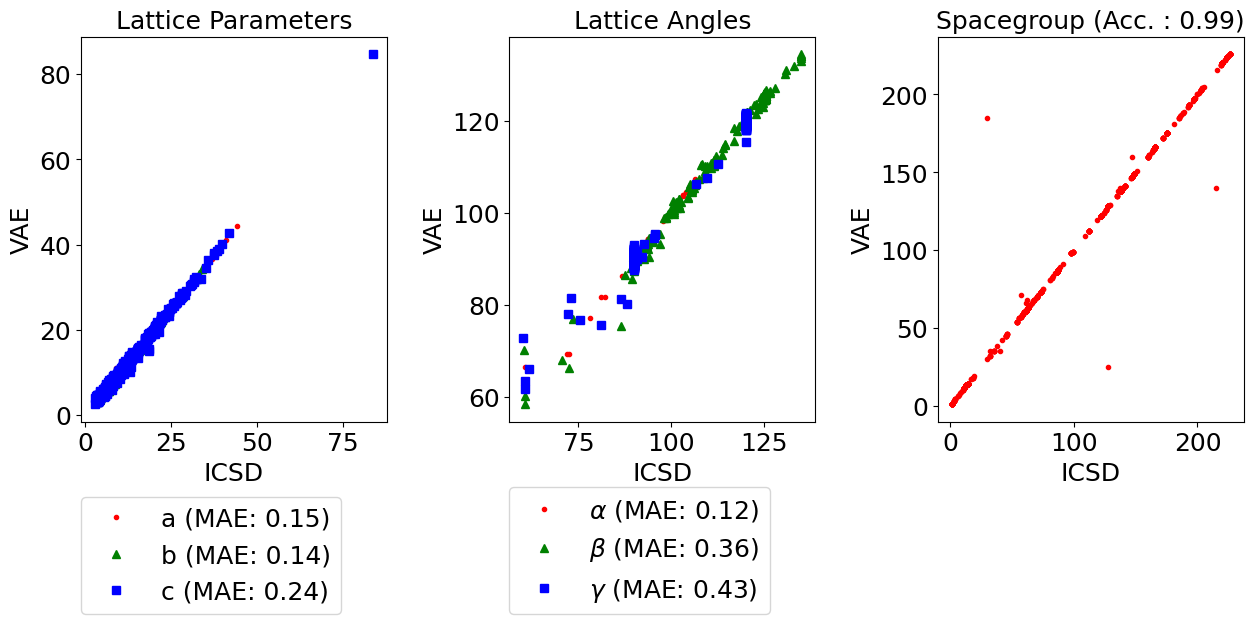

In [117]:
from sklearn.metrics import accuracy_score, auc

abc_vae = vae_lattice[:, :3]
angles_vae = vae_lattice[:, 3:]
spacegroup_vae = np.argmax(vae_sg, axis=1)
print(abc_vae.shape, angles_vae.shape, spacegroup_vae.shape)
abc_test = y_test_lattice[:, :3]
angles_test = y_test_lattice[:, 3:6]
spacegroup_test = np.argmax(y_test_sg, axis=1)
print(abc_test.shape, angles_test.shape, spacegroup_test.shape)
# Plot the Crystal representation in three plots
fig, ax = plt.subplots(1, 3, figsize=(15, 5),gridspec_kw={'wspace':0.4})
font_size = 18
shapes = ['.','^','s']
colors = ['r','g','b']
abc_labels = ['a','b','c']
label_loc = [0,-0.5]
angle_labels = [r'$\alpha$',r'$\beta$',r'$\gamma$']
for i in range(3):
    mae = np.mean(np.abs(abc_test[:,i] - abc_vae[:,i]))
    ax[0].plot(abc_test[:,i], abc_vae[:,i], marker=shapes[i], color=colors[i], linestyle='None', label=abc_labels[i]+f' (MAE: {mae:.2f})')
    ax[0].set_xlabel('ICSD', fontsize=font_size)
    ax[0].set_ylabel('VAE', fontsize=font_size)
    ax[0].set_title('Lattice Parameters', fontsize=font_size)
    ax[0].tick_params(axis='both', which='major', labelsize=font_size)
    ax[0].tick_params(axis='both', which='minor', labelsize=font_size)
    
    ax[0].legend(fontsize=font_size,loc=label_loc)

    mae = np.mean(np.abs(angles_test[:,i] - angles_vae[:,i]))
    ax[1].plot(angles_test[:,i], angles_vae[:,i], marker=shapes[i], color=colors[i], linestyle='None', label=angle_labels[i]+f' (MAE: {mae:.2f})')
    ax[1].set_xlabel('ICSD', fontsize=font_size)
    ax[1].set_ylabel('VAE', fontsize=font_size)
    ax[1].set_title('Lattice Angles', fontsize=font_size)
    ax[1].tick_params(axis='both', which='major', labelsize=font_size)
    ax[1].tick_params(axis='both', which='minor', labelsize=font_size)
    ax[1].legend(fontsize=font_size,loc=label_loc)

# Spacegroup
# Accuracy
spg_accuracy = accuracy_score(spacegroup_test, spacegroup_vae)

mae = np.mean(np.abs(spacegroup_test - spacegroup_vae))
ax[2].plot(spacegroup_test, spacegroup_vae, marker='.', color='r', linestyle='None')
ax[2].set_xlabel('ICSD', fontsize=font_size)
ax[2].set_ylabel('VAE', fontsize=font_size)
ax[2].set_title('Spacegroup'+f' (Acc. : {spg_accuracy:.2f})', fontsize=font_size)
ax[2].tick_params(axis='both', which='major', labelsize=font_size)

Element: (1804, 24, 101)
Frac. coords: (1804, 24, 3)
Wyckoff letter: (1804, 24, 27)
Wyckoff mult: (1804, 24, 51)


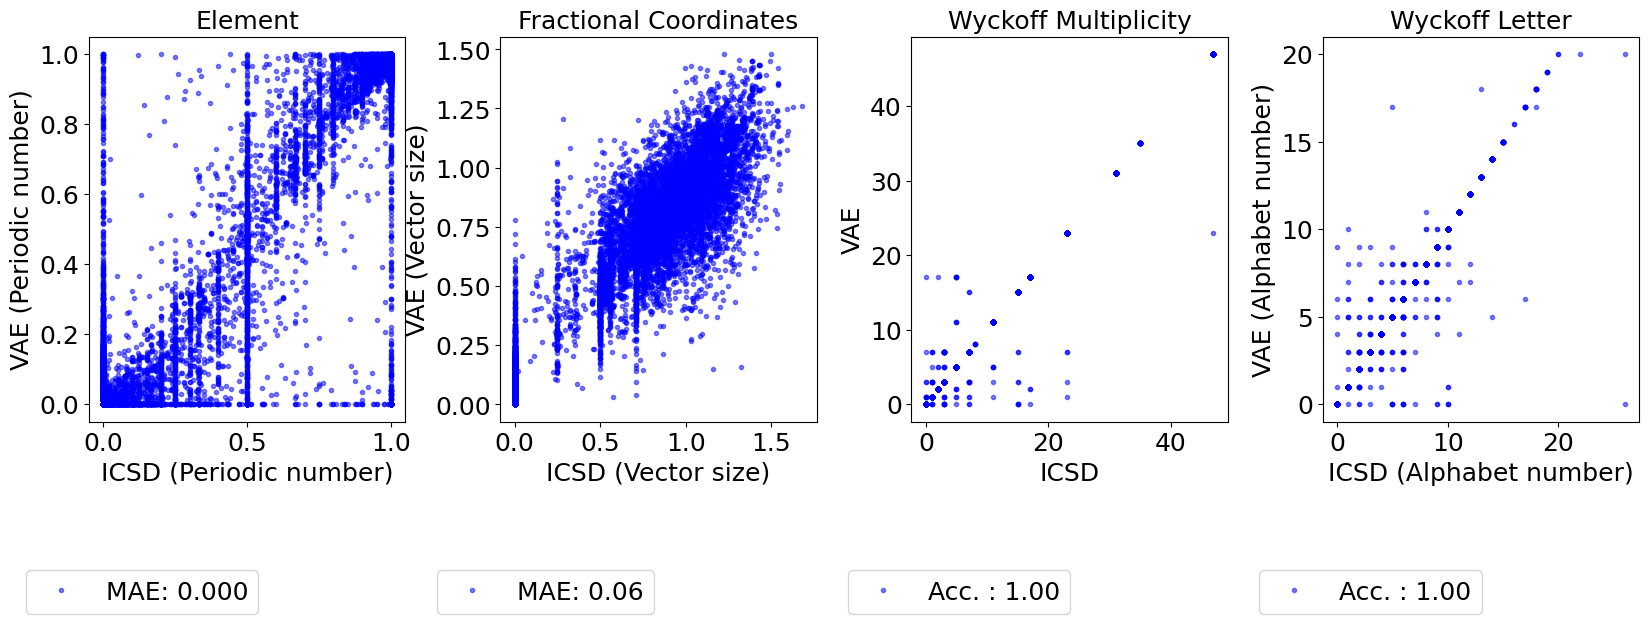

In [118]:
element_test = x_test_plot[:,:,:101]
frac_coords_test = x_test_plot[:,:,-30:-27]
wyckoff_letter_test = x_test_plot[:,:,-27:]
wyckoff_mult_test = x_test_plot[:,:,101:-30]
print('Element:',element_test.shape)
print('Frac. coords:',frac_coords_test.shape)
print('Wyckoff letter:',wyckoff_letter_test.shape)
print('Wyckoff mult:',wyckoff_mult_test.shape)


# Plot VAE vs ICSD
fig, ax = plt.subplots(1, 4, figsize=(20, 5),gridspec_kw={'wspace':0.3})
font_size = 18
markers = ['.','^','s']
colors = ['b','g','r']
alpha = 0.5
i = 0

# Element ACC
element_index = vae_element > 0.01 # Get the index of the element in the one-hot encoding
# Set the 
element_test_plot = element_test
element_vae_plot = vae_element.copy()
element_vae_plot[~element_index] = 0

# Flatten the arrays
element_test_plot = element_test_plot.flatten()
element_vae_plot = element_vae_plot.flatten()

mae_element = np.mean(np.abs(element_test_plot - element_vae_plot))
ax[0].plot(element_test_plot, element_vae_plot, marker=markers[i], color=colors[i], 
            linestyle='None',label=f'MAE: {mae_element:.3f}',alpha=alpha)
ax[0].set_xlabel('ICSD (Periodic number)', fontsize=font_size)
ax[0].set_ylabel('VAE (Periodic number)', fontsize=font_size)
ax[0].set_title('Element', fontsize=font_size)
ax[0].tick_params(axis='both', which='major', labelsize=font_size)
ax[0].tick_params(axis='both', which='minor', labelsize=font_size)
ax[0].legend(fontsize=font_size,loc=(-0.2,-0.5))

# Fractional Coordinates
frac_coords_test_plot = np.sqrt(np.sum(np.square(frac_coords_test),axis=2))
frac_coords_vae_plot = np.sqrt(np.sum(np.square(vae_frac_coords),axis=2))

frac_coords_test_plot = frac_coords_test_plot.flatten()
frac_coords_vae_plot = frac_coords_vae_plot.flatten()
mae = np.mean(np.abs(frac_coords_test_plot - frac_coords_vae_plot))
ax[1].plot(frac_coords_test_plot, frac_coords_vae_plot, marker=markers[i], color=colors[i], 
            linestyle='None',label=f'MAE: {mae:.2f}',alpha=alpha)
ax[1].set_xlabel('ICSD (Vector size)', fontsize=font_size)
ax[1].set_ylabel('VAE (Vector size)', fontsize=font_size)
ax[1].set_title('Fractional Coordinates', fontsize=font_size)
ax[1].tick_params(axis='both', which='major', labelsize=font_size)
ax[1].tick_params(axis='both', which='minor', labelsize=font_size)
ax[1].legend(fontsize=font_size,loc=(-0.2,-0.5))

# Wyckoff Multiplicity

wyckoff_mult_test_plot = np.argmax(wyckoff_mult_test[:,:,:],axis=2)
wyckoff_mult_vae_plot = np.argmax(vae_wyckoff_multiplier[:,:,:],axis=2)
#Flatten the arrays
wyckoff_mult_test_plot = wyckoff_mult_test_plot.flatten()
wyckoff_mult_vae_plot = wyckoff_mult_vae_plot.flatten()

#mae = np.mean(np.abs(wyckoff_mult_test_plot - wyckoff_mult_vae_plot))
acc_wyckoff_mult = accuracy_score(wyckoff_mult_test_plot, wyckoff_mult_vae_plot) # same as taking the mean of the wyckoff sites and then the mean of the structures

ax[2].plot(wyckoff_mult_test_plot, wyckoff_mult_vae_plot, marker=markers[i], color=colors[i],
            linestyle='None',label=f'Acc. : {acc_wyckoff_mult:.2f}',alpha=alpha)
ax[2].set_xlabel('ICSD', fontsize=font_size)
ax[2].set_ylabel('VAE', fontsize=font_size)
ax[2].set_title('Wyckoff Multiplicity', fontsize=font_size)
ax[2].tick_params(axis='both', which='major', labelsize=font_size)
ax[2].tick_params(axis='both', which='minor', labelsize=font_size)
ax[2].legend(fontsize=font_size,loc=(-0.2,-0.5))

# Wyckoff Letter
wyckoff_letter_test_plot = wyckoff_letter_test
wyckoff_letter_vae_plot = vae_wyckoff_letter
wyckoff_letter_test_elem = np.argmax(wyckoff_letter_test_plot,axis=2)
wyckoff_letter_vae_elem = np.argmax(wyckoff_letter_vae_plot,axis=2)
# Flatten the arrays
wyckoff_letter_test_elem = wyckoff_letter_test_elem.flatten()
wyckoff_letter_vae_elem = wyckoff_letter_vae_elem.flatten()
#mae = np.mean(np.abs(wyckoff_letter_test_elem - wyckoff_letter_vae_elem))
acc_wyckoff_letter = accuracy_score(wyckoff_letter_test_elem, wyckoff_letter_vae_elem)
ax[3].plot(wyckoff_letter_test_elem, wyckoff_letter_vae_elem, marker=markers[i], color=colors[i], 
            linestyle='None',label=f'Acc. : {acc_wyckoff_letter:.2f}',alpha=alpha)
ax[3].set_xlabel('ICSD (Alphabet number)', fontsize=font_size)
ax[3].set_ylabel('VAE (Alphabet number)', fontsize=font_size)
ax[3].set_title('Wyckoff Letter', fontsize=font_size)
ax[3].tick_params(axis='both', which='major', labelsize=font_size)
ax[3].tick_params(axis='both', which='minor', labelsize=font_size)
ax[3].legend(fontsize=font_size,loc=(-0.2,-0.5))

    

#### Tensorflow

In [10]:
X = crystal_rep.total_atomistic_features
Y = crystal_rep.total_crystal_features

np.save('X.npy',X)
np.save('Y.npy',Y)

In [3]:
X = np.load('X.npy')#crystal_rep.total_atomistic_features
Y = np.load('Y.npy')#crystal_rep.total_crystal_features
print('X:',X.shape)
print('Y:',Y.shape)

# Setup scaler for X and Y
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

# Scale the 27'th element for x (wyckoff multiplier)
X_scaled = X.copy()
X_scaled[:,-27,:] = scaler_X.fit_transform(X[:,-27,:].reshape(-1,1)).reshape(X[:,-27,:].shape)

# Scale the first 6 element of Y (lattice constants and angles)
Y_scaled = Y.copy()
Y_scaled[:,:6] = scaler_Y.fit_transform(Y[:,:6])

# Set X and Y to torch tensors
X = X_scaled
Y = Y_scaled

test_size = 0.2
val_size = 0.1

x_train_val,x_test,y_train_val,y_test=train_test_split( X \
                                               ,Y,test_size=test_size)
x_train,x_val,y_train,y_val = train_test_split(x_train_val,y_train_val,test_size=val_size)
print('Train:',x_train.shape,y_train.shape)
print('Val:',x_val.shape,y_val.shape)
print('Test:',x_test.shape,y_test.shape)

X: (4825, 131, 24)
Y: (4825, 236)
Train: (3474, 131, 24) (3474, 236)
Val: (386, 131, 24) (386, 236)
Test: (965, 131, 24) (965, 236)


In [12]:
X[:,-27,:], Y[:,:6]

(array([[ 0.07854854,  0.46670744,  0.46670744, ..., -0.30961035,
         -0.30961035, -0.30961035],
        [ 0.07854854,  0.46670744,  0.46670744, ..., -0.30961035,
         -0.30961035, -0.30961035],
        [ 0.07854854,  0.27262799,  0.07854854, ..., -0.30961035,
         -0.30961035, -0.30961035],
        ...,
        [ 0.07854854,  0.07854854,  0.07854854, ..., -0.30961035,
         -0.30961035, -0.30961035],
        [ 1.24302523,  0.46670744,  0.46670744, ..., -0.30961035,
         -0.30961035, -0.30961035],
        [ 1.24302523,  0.46670744,  0.46670744, ..., -0.30961035,
         -0.30961035, -0.30961035]]),
 array([[-0.8023923 , -0.86879381,  1.58299515,  0.01605032, -0.3063777 ,
         -0.39038566],
        [-0.79938622, -0.8657312 ,  1.59130922,  0.01605032, -0.3063777 ,
         -0.39038566],
        [-0.21710403, -0.27249957, -0.64175304,  0.01605032, -0.3063777 ,
          2.40445056],
        ...,
        [-0.32705383, -0.38451691, -0.45797616,  0.01605032, -0.30637

In [4]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, Input, Dense, Lambda, Conv1DTranspose, LeakyReLU, Activation, Flatten, Reshape, BatchNormalization, concatenate, Softmax
from tensorflow.keras.callbacks import ReduceLROnPlateau,CSVLogger,LearningRateScheduler,EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop

# Define your data dimensions
wyckoff_dim = x_train.shape[2]
feature_dim = x_train.shape[1]
crystal_dim = y_train.shape[1]
one_hot_dim = 101
wyckoff_letter_dim = 26
print('Feature:',feature_dim)
print('Wyckoff:',wyckoff_dim)
print('Crystal:',crystal_dim)

latent_dim = 256
max_filter =32
strides = [1, 1, 1]
kernel = [3,2, 2]

K.clear_session()
x = Input(shape=( feature_dim,wyckoff_dim,), name='atomic_features')
x2 = Input(shape=(crystal_dim,), name="crystal_features")

# Encoder crystal information into latent space
en0 = Conv1D(max_filter // 4, kernel[0], strides=strides[0], padding='SAME')(x)
en0 = BatchNormalization()(en0)
en0 = LeakyReLU(0.2)(en0)
print('En0:',en0.shape)
en1 = Conv1D(max_filter // 2, kernel[1], strides=strides[1], padding='SAME')(en0)
en1 = BatchNormalization()(en1)
en1 = LeakyReLU(0.2)(en1)
print('En1:',en1.shape)
en2 = Conv1D(max_filter, kernel[2], strides=strides[2], padding='SAME')(en1)
en2 = BatchNormalization()(en2)
en2 = LeakyReLU(0.2)(en2)
print('En2:',en2.shape)
en3 = Flatten()(en2)
print('En3:',en3.shape)
en4 = Dense(1024, activation='relu')(en3)
print('En4:',en4.shape)

### Encoder crystal ###
crystal_latent = Dense(256, activation='relu')(x2)
crystal_latent = Dense(128, activation='relu')(crystal_latent)

### Latent space ###
latent = concatenate([en4, crystal_latent])

z_mean = Dense(latent_dim, activation='linear')(latent)
z_log_var = Dense(latent_dim, activation='linear')(latent)
print('Z Mean:',z_mean.shape)
print('Z Log Var:',z_log_var.shape)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0, stddev=1)
    return z_mean + K.exp(z_log_var / 2) * epsilon

# Sampling layer
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])
# Total Encoder
encoder = Model([x, x2], z)

# Latent inputs
latent_inputs = Input(shape=(latent_dim,))
print('Latent Inputs:',latent_inputs.shape)

### Decoded Crystal ###
decoded_crystal_init = Dense(crystal_dim, activation='relu')(latent_inputs)

# Decoded space group
decoded_sg = Dense(230, activation='softmax')(decoded_crystal_init)
print('Decoded SG:',decoded_sg.shape)

# Decoded lattice
decoded_lattice = Dense(6, activation='relu')(decoded_crystal_init)
decoded_lattice = Activation('linear')(decoded_lattice)
print('Decoded Lattice:',decoded_lattice.shape)

# Combine the decoded crystal
decoded_crystal = concatenate([decoded_lattice,decoded_sg],axis=1)
print('Decoded Crystal:',decoded_crystal.shape)

### Decoded Atomistic ###
# Set the maping dimensions
map_size1 = K.int_shape(encoder.layers[-11].output)[1] 

# Main Decoder
de1 = Dense(map_size1*max_filter, activation='relu')(latent_inputs)
print('Del1:',de1.shape)
de1 = Reshape((map_size1,max_filter,))(de1)
de1 = BatchNormalization()(de1)
print('De1:',de1.shape)

de2 = Conv1DTranspose(max_filter // 2, kernel[2], strides=strides[2], padding='SAME')(de1)
de2 = BatchNormalization()(de2)
de2 = Activation('relu')(de2)
print('De2:',de2.shape)

de3 = Conv1DTranspose(max_filter // 4, kernel[1], strides=strides[1], padding='SAME')(de2)
de3 = BatchNormalization()(de3)
de3 = Activation('relu')(de3)
print('De3:',de3.shape)

de4 = Conv1DTranspose(wyckoff_dim, kernel[0], strides=strides[0], padding='SAME')(de3)
print('De4:',de4.shape)

decoder_outputs = Activation('linear')(de4)

# Total Decoder
decoder = Model(latent_inputs, [decoder_outputs, decoded_crystal])

print('Decoder Outputs:',decoder_outputs.shape)
print('Input:',x.shape)

# Complete VAE model
[reconstructed_outputs, reconstructed_sg]= decoder(z)
VAE = Model(inputs=[x, x2], outputs=[reconstructed_outputs, reconstructed_sg])
VAE.summary()


Feature: 131
Wyckoff: 24
Crystal: 236
En0: (None, 131, 8)
En1: (None, 131, 16)
En2: (None, 131, 32)
En3: (None, 4192)
En4: (None, 1024)
Z Mean: (None, 256)
Z Log Var: (None, 256)
Latent Inputs: (None, 256)
Decoded SG: (None, 230)
Decoded Lattice: (None, 6)
Decoded Crystal: (None, 236)
Del1: (None, 4192)
De1: (None, 131, 32)
De2: (None, 131, 16)
De3: (None, 131, 8)
De4: (None, 131, 24)
Decoder Outputs: (None, 131, 24)
Input: (None, 131, 24)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 atomic_features (InputLaye  [(None, 131, 24)]            0         []                            
 r)                                                                                               
                                                                                                  
 conv1d (Conv1D)             (None, 131, 8) 

In [5]:
coeff_wyckoff_letter = 2.560e-3
coeff_elem = 2.560e-3
coeff_disorder = 5e-2
coeff_frac_coord = 5e-2

coeff_lattice = 1e-1
coeff_sg = 1e-1

coeff_KL = 5e-1

# Atomistic loss
loss_ele = coeff_elem* K.mean(tf.keras.losses.categorical_crossentropy(x[:,:one_hot_dim], reconstructed_outputs[:,:one_hot_dim])) # FIX distance between multiple clases
loss_wyckoff_letter = coeff_wyckoff_letter* K.mean(tf.keras.losses.categorical_crossentropy(x[:,-27:], reconstructed_outputs[:,-27:]))
loss_disorder = coeff_disorder * K.mean(K.square(x[:, -27, :] - reconstructed_outputs[:, -27, :])) 
loss_frac_coord = coeff_frac_coord * K.mean(K.square(x[:, -30:-27, :] - reconstructed_outputs[:, -30:-27, :])) 
print('Loss Element:',loss_ele)
print('Loss Wyckoff Letter:',loss_wyckoff_letter)
print('Loss Formula:',loss_disorder)
print('Loss Fractional Coordinate:',loss_frac_coord)

# Crystal loss
loss_sg = coeff_sg * K.mean(tf.keras.losses.categorical_crossentropy(x2[:,6:], reconstructed_sg[:,6:]))
loss_lattice = coeff_lattice * K.mean(K.square(x2[:, :6] - reconstructed_sg[:, :6]))
print('Loss Spacegroup:',loss_sg)
print('Loss Lattice:',loss_lattice)

# KL divergence
loss_KL = coeff_KL * K.mean(
    - 0.5 * 1 / latent_dim * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1))
print('Loss KL:',loss_KL)

# Total loss
vae_loss = loss_wyckoff_letter  + loss_disorder + loss_frac_coord + loss_sg + loss_lattice + loss_ele #+ loss_KL
print('Total Loss:',vae_loss)

# Compile the model
VAE.add_loss(vae_loss)
VAE.add_metric(loss_ele, name='loss_element', aggregation='mean')
VAE.add_metric(loss_wyckoff_letter, name='loss_wyckoff_letter', aggregation='mean')
VAE.add_metric(loss_disorder, name='loss_disorder', aggregation='mean')
VAE.add_metric(loss_frac_coord, name='loss_frac_coord', aggregation='mean')
VAE.add_metric(loss_sg, name='loss_sg', aggregation='mean')
VAE.add_metric(loss_lattice, name='loss_lattice', aggregation='mean')
VAE.add_metric(loss_KL, name='loss_KL', aggregation='mean')

VAE.compile(optimizer=RMSprop(learning_rate=2e-4))

Loss Element: KerasTensor(type_spec=TensorSpec(shape=(), dtype=tf.float32, name=None), name='tf.math.multiply/Mul:0', description="created by layer 'tf.math.multiply'")
Loss Wyckoff Letter: KerasTensor(type_spec=TensorSpec(shape=(), dtype=tf.float32, name=None), name='tf.math.multiply_1/Mul:0', description="created by layer 'tf.math.multiply_1'")
Loss Formula: KerasTensor(type_spec=TensorSpec(shape=(), dtype=tf.float32, name=None), name='tf.math.multiply_2/Mul:0', description="created by layer 'tf.math.multiply_2'")
Loss Fractional Coordinate: KerasTensor(type_spec=TensorSpec(shape=(), dtype=tf.float32, name=None), name='tf.math.multiply_3/Mul:0', description="created by layer 'tf.math.multiply_3'")
Loss Spacegroup: KerasTensor(type_spec=TensorSpec(shape=(), dtype=tf.float32, name=None), name='tf.math.multiply_4/Mul:0', description="created by layer 'tf.math.multiply_4'")
Loss Lattice: KerasTensor(type_spec=TensorSpec(shape=(), dtype=tf.float32, name=None), name='tf.math.multiply_5/Mul

In [6]:
### VAE training ###
history = VAE.fit(x=[x_train, y_train], shuffle=True,
        batch_size=16, epochs=50,
        validation_data=([x_val, y_val], None))


: 

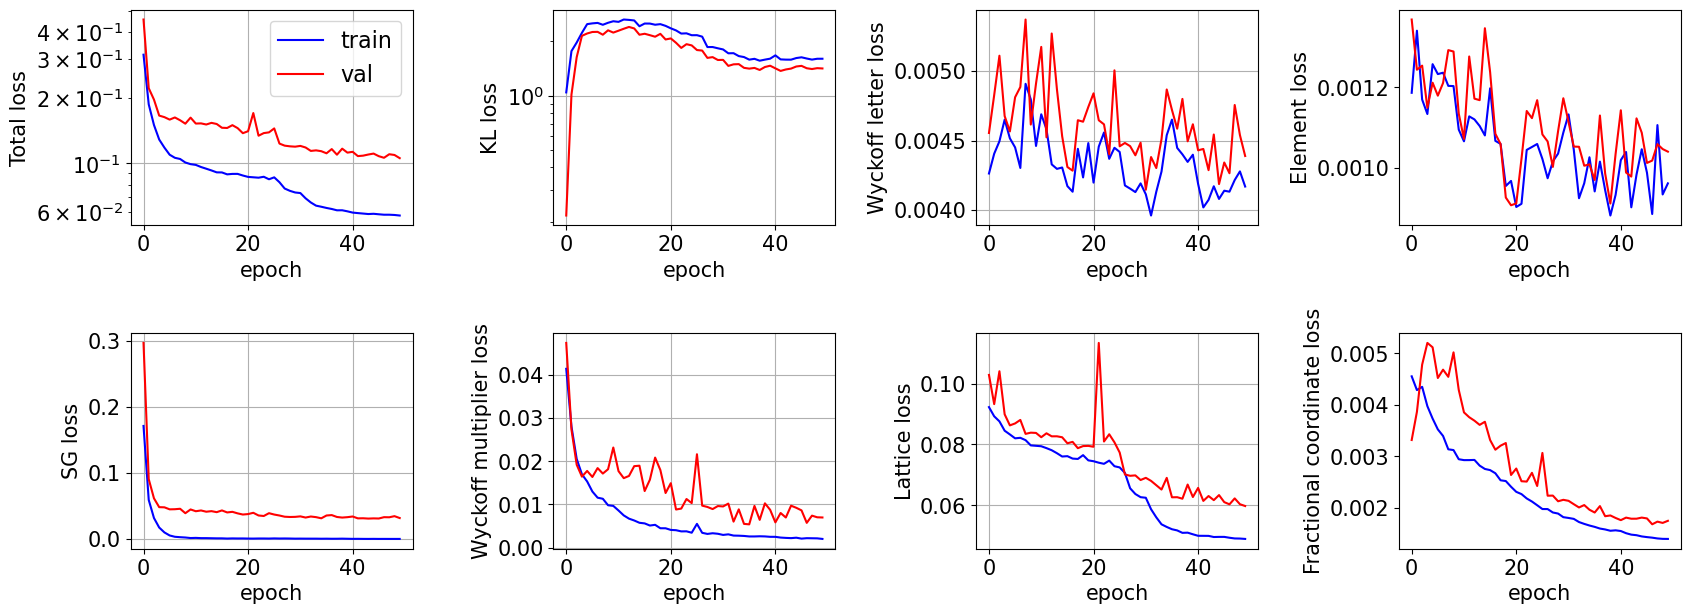

In [ ]:
## Plot all the losses
fig, ax = plt.subplots(figsize=(20,7), ncols=4, nrows=2,gridspec_kw={'wspace':0.5,'hspace':0.5})

font_size = 15
legend_font_size = 16
train_color = 'b'
val_color = 'r'

ax[0,0].plot(history.history['loss'],color=train_color, label='train')
ax[0,0].plot(history.history['val_loss'],color=val_color, label='val')
ax[0,0].legend(fontsize=legend_font_size)
ax[0,0].set_ylabel('Total loss', fontsize=font_size)
ax[0,0].set_xlabel('epoch', fontsize=font_size)
ax[0,0].tick_params(axis='both', which='major', labelsize=font_size)
ax[0,0].tick_params(axis='both', which='minor', labelsize=font_size)
ax[0,0].grid(True)
ax[0,0].set_yscale('log')

ax[0,1].plot(history.history['loss_KL'],color=train_color, label='train')
ax[0,1].plot(history.history['val_loss_KL'],color=val_color, label='val')
#ax[0,1].legend(fontsize=legend_font_size)
ax[0,1].set_ylabel('KL loss', fontsize=font_size)
ax[0,1].set_xlabel('epoch', fontsize=font_size)
ax[0,1].tick_params(axis='both', which='major', labelsize=font_size)
ax[0,1].tick_params(axis='both', which='minor', labelsize=font_size)
ax[0,1].grid(True)
ax[0,1].set_yscale('log')

ax[0,2].plot(history.history['loss_wyckoff_letter'],color=train_color, label='train')
ax[0,2].plot(history.history['val_loss_wyckoff_letter'],color=val_color, label='val')
#ax[0,2].legend(fontsize=legend_font_size)
ax[0,2].set_ylabel('Wyckoff letter loss', fontsize=font_size)
ax[0,2].set_xlabel('epoch', fontsize=font_size)
ax[0,2].tick_params(axis='both', which='major', labelsize=font_size)
ax[0,2].tick_params(axis='both', which='minor', labelsize=font_size)
ax[0,2].grid(True)

ax[0,3].plot(history.history['loss_element'],color=train_color, label='train')
ax[0,3].plot(history.history['val_loss_element'],color=val_color, label='val')
#ax[0,3].legend(fontsize=legend_font_size)
ax[0,3].set_ylabel('Element loss', fontsize=font_size)
ax[0,3].set_xlabel('epoch', fontsize=font_size)
ax[0,3].tick_params(axis='both', which='major', labelsize=font_size)
ax[0,3].tick_params(axis='both', which='minor', labelsize=font_size)

ax[1,0].plot(history.history['loss_sg'],color=train_color, label='train')
ax[1,0].plot(history.history['val_loss_sg'],color=val_color, label='val')
#ax[1,0].legend(fontsize=legend_font_size)
ax[1,0].set_ylabel('SG loss', fontsize=font_size)
ax[1,0].set_xlabel('epoch', fontsize=font_size)
ax[1,0].tick_params(axis='both', which='major', labelsize=font_size)
ax[1,0].tick_params(axis='both', which='minor', labelsize=font_size)
ax[1,0].grid(True)
ax

ax[1,1].plot(history.history['loss_disorder'],color=train_color, label='train')
ax[1,1].plot(history.history['val_loss_disorder'],color=val_color, label='val')
#ax[1,1].legend(fontsize=legend_font_size)
ax[1,1].set_ylabel('Wyckoff multiplier loss', fontsize=font_size)
ax[1,1].set_xlabel('epoch', fontsize=font_size)
ax[1,1].tick_params(axis='both', which='major', labelsize=font_size)
ax[1,1].tick_params(axis='both', which='minor', labelsize=font_size)
ax[1,1].grid(True)

ax[1,2].plot(history.history['loss_lattice'],color=train_color, label='train')
ax[1,2].plot(history.history['val_loss_lattice'],color=val_color, label='val')
#ax[1,2].legend(fontsize=legend_font_size)
ax[1,2].set_ylabel('Lattice loss', fontsize=font_size)
ax[1,2].set_xlabel('epoch', fontsize=font_size)
ax[1,2].tick_params(axis='both', which='major', labelsize=font_size)
ax[1,2].tick_params(axis='both', which='minor', labelsize=font_size)
ax[1,2].grid(True)

ax[1,3].plot(history.history['loss_frac_coord'],color=train_color, label='train')
ax[1,3].plot(history.history['val_loss_frac_coord'],color=val_color, label='val')
#ax[1,3].legend(fontsize=legend_font_size)
ax[1,3].set_ylabel('Fractional coordinate loss', fontsize=font_size)
ax[1,3].set_xlabel('epoch', fontsize=font_size)
ax[1,3].tick_params(axis='both', which='major', labelsize=font_size)
ax[1,3].tick_params(axis='both', which='minor', labelsize=font_size)



In [ ]:
# Model performance 
vae_x, vae_sg = VAE.predict([x_test, y_test])
print(vae_x.shape, vae_sg.shape)

# Inverse transform the data
vae_x[:,-27,:] = scaler_X.inverse_transform(vae_x[:,-27,:].reshape(-1,1)).reshape(vae_x[:,-27,:].shape)
vae_sg[:,:6] = scaler_Y.inverse_transform(vae_sg[:,:6])


# Inverse transform the data
x_test[:,-27,:] = scaler_X.inverse_transform(x_test[:,-27,:].reshape(-1,1)).reshape(x_test[:,-27,:].shape)
y_test[:,:6] = scaler_Y.inverse_transform(y_test[:,:6])

AttributeError: type object 'VAE' has no attribute 'predict'

(965, 3) (965, 3) (965,)


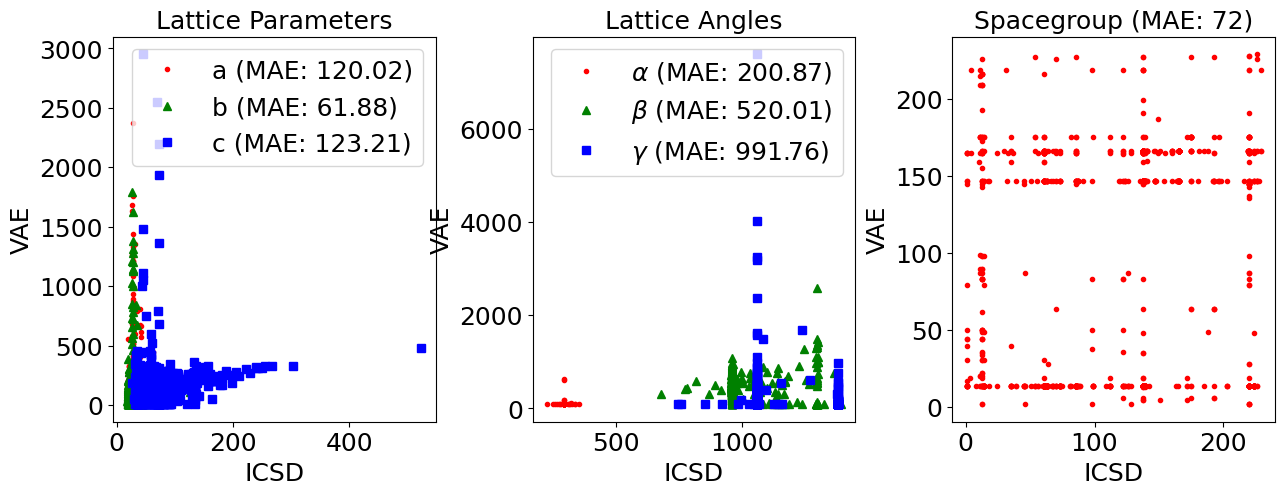

In [ ]:
abc_vae = vae_sg[:, :3]
angles_vae = vae_sg[:, 3:6]
spacegroup_vae = np.argmax(vae_sg[:,6:], axis=1)
print(abc_vae.shape, angles_vae.shape, spacegroup_vae.shape)
abc_test = y_test[:, :3]
angles_test = y_test[:, 3:6]
spacegroup_test = np.argmax(y_test[:,6:], axis=1)
# Plot the Crystal representation in three plots
fig, ax = plt.subplots(1, 3, figsize=(15, 5),gridspec_kw={'wspace':0.3})
font_size = 18
shapes = ['.','^','s']
colors = ['r','g','b']
abc_labels = ['a','b','c']
angle_labels = [r'$\alpha$',r'$\beta$',r'$\gamma$']
for i in range(3):
    mae = np.mean(np.abs(abc_test[:,i] - abc_vae[:,i]))
    ax[0].plot(abc_test[:,i], abc_vae[:,i], marker=shapes[i], color=colors[i], linestyle='None', label=abc_labels[i]+f' (MAE: {mae:.2f})')
    ax[0].set_xlabel('ICSD', fontsize=font_size)
    ax[0].set_ylabel('VAE', fontsize=font_size)
    ax[0].set_title('Lattice Parameters', fontsize=font_size)
    ax[0].tick_params(axis='both', which='major', labelsize=font_size)
    ax[0].tick_params(axis='both', which='minor', labelsize=font_size)
    
    ax[0].legend(fontsize=font_size)

    mae = np.mean(np.abs(angles_test[:,i] - angles_vae[:,i]))
    ax[1].plot(angles_test[:,i], angles_vae[:,i], marker=shapes[i], color=colors[i], linestyle='None', label=angle_labels[i]+f' (MAE: {mae:.2f})')
    ax[1].set_xlabel('ICSD', fontsize=font_size)
    ax[1].set_ylabel('VAE', fontsize=font_size)
    ax[1].set_title('Lattice Angles', fontsize=font_size)
    ax[1].tick_params(axis='both', which='major', labelsize=font_size)
    ax[1].tick_params(axis='both', which='minor', labelsize=font_size)
    ax[1].legend(fontsize=font_size)

mae = np.mean(np.abs(spacegroup_test - spacegroup_vae))
ax[2].plot(spacegroup_test, spacegroup_vae, marker='.', color='r', linestyle='None')
ax[2].set_xlabel('ICSD', fontsize=font_size)
ax[2].set_ylabel('VAE', fontsize=font_size)
ax[2].set_title('Spacegroup'+f' (MAE: {mae:.0f})', fontsize=font_size)
ax[2].tick_params(axis='both', which='major', labelsize=font_size)

    

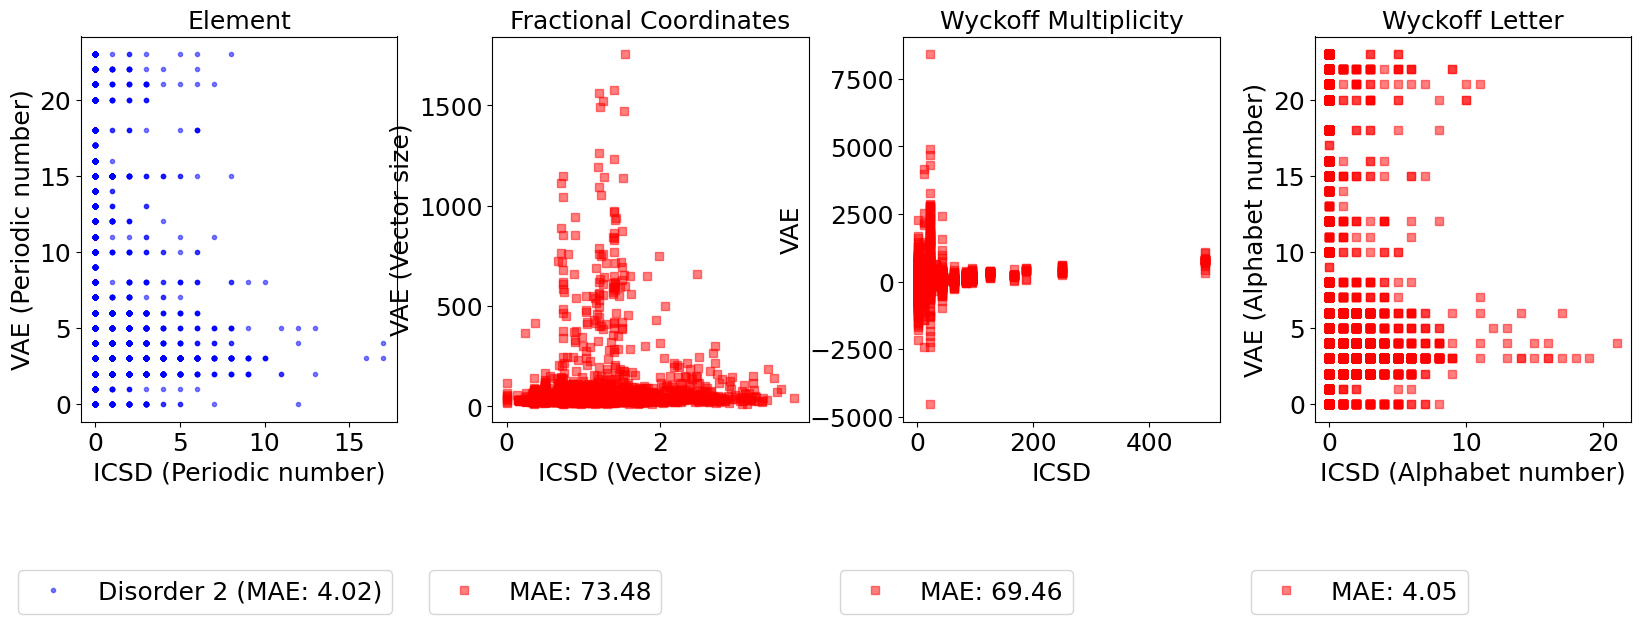

In [ ]:

onehot_test = x_test[:,:101,:]
frac_coords_test = x_test[:,-30:-27,:]
wyckoff_letter_test = x_test[:,-27:,:]
wyckoff_mult_test = x_test[:,-27,:]

onehot_vae = vae_x[:,:101,:]
frac_coords_vae = vae_x[:,-30:-27,:]
wyckoff_letter_vae = vae_x[:,-27:,:]
wyckoff_mult_vae = vae_x[:,-27,:]

wyckoff_size = onehot_test.shape[1]
structure_size = onehot_test.shape[0]

# Plot VAE vs ICSD
fig, ax = plt.subplots(1, 4, figsize=(20, 5),gridspec_kw={'wspace':0.3})
font_size = 18
markers = ['s','^','.']
colors = ['r','g','b']
alpha = 0.5
i = 0

# Element ACC
one_hot_test_plot = onehot_test[:,:,:]
one_hot_vae_plot = onehot_vae[:,:,:]
one_hot_test_elem = np.argmax(one_hot_test_plot,axis=2)
one_hot_vae_elem = np.argmax(one_hot_vae_plot,axis=2)
# Flatten the arrays
one_hot_test_elem = one_hot_test_elem.flatten()
one_hot_vae_elem = one_hot_vae_elem.flatten()
mae = np.mean(np.abs(one_hot_test_elem - one_hot_vae_elem))
ax[0].plot(one_hot_test_elem, one_hot_vae_elem, marker=markers[i], color=colors[i], 
            linestyle='None',label=f'MAE: {mae:.2f}',alpha=alpha)
ax[0].set_xlabel('ICSD (Periodic number)', fontsize=font_size)
ax[0].set_ylabel('VAE (Periodic number)', fontsize=font_size)
ax[0].set_title('Element', fontsize=font_size)
ax[0].tick_params(axis='both', which='major', labelsize=font_size)
ax[0].tick_params(axis='both', which='minor', labelsize=font_size)
ax[0].legend(fontsize=font_size,loc=(-0.2,-0.5))

# Fractional Coordinates
frac_coords_test_plot = np.sqrt(np.sum(np.square(frac_coords_test[:,:,:]),axis=2))
frac_coords_vae_plot = np.sqrt(np.sum(np.square(frac_coords_vae[:,:,:]),axis=2))
frac_coords_test_plot = frac_coords_test_plot.flatten()
frac_coords_vae_plot = frac_coords_vae_plot.flatten()
mae = np.mean(np.abs(frac_coords_test_plot - frac_coords_vae_plot))
ax[1].plot(frac_coords_test_plot, frac_coords_vae_plot, marker=markers[i], color=colors[i], 
            linestyle='None',label=f'MAE: {mae:.2f}',alpha=alpha)
ax[1].set_xlabel('ICSD (Vector size)', fontsize=font_size)
ax[1].set_ylabel('VAE (Vector size)', fontsize=font_size)
ax[1].set_title('Fractional Coordinates', fontsize=font_size)
ax[1].tick_params(axis='both', which='major', labelsize=font_size)
ax[1].tick_params(axis='both', which='minor', labelsize=font_size)
ax[1].legend(fontsize=font_size,loc=(-0.2,-0.5))

# Wyckoff Multiplicity

wyckoff_mult_test_plot = wyckoff_mult_test[:,:]
wyckoff_mult_vae_plot = wyckoff_mult_vae[:,:]

wyckoff_mult_test_plot = wyckoff_mult_test_plot.flatten()
wyckoff_mult_vae_plot = wyckoff_mult_vae_plot.flatten()
mae = np.mean(np.abs(wyckoff_mult_test_plot - wyckoff_mult_vae_plot))
ax[2].plot(wyckoff_mult_test_plot, wyckoff_mult_vae_plot, marker=markers[i], color=colors[i],
            linestyle='None',label=f'MAE: {mae:.2f}',alpha=alpha)
ax[2].set_xlabel('ICSD', fontsize=font_size)
ax[2].set_ylabel('VAE', fontsize=font_size)
ax[2].set_title('Wyckoff Multiplicity', fontsize=font_size)
ax[2].tick_params(axis='both', which='major', labelsize=font_size)
ax[2].tick_params(axis='both', which='minor', labelsize=font_size)
ax[2].legend(fontsize=font_size,loc=(-0.2,-0.5))

# Wyckoff Letter
wyckoff_letter_test_plot = wyckoff_letter_test[:,:,:]
wyckoff_letter_vae_plot = wyckoff_letter_vae[:,:,:]
wyckoff_letter_test_elem = np.argmax(wyckoff_letter_test_plot,axis=2)
wyckoff_letter_vae_elem = np.argmax(wyckoff_letter_vae_plot,axis=2)
# Flatten the arrays
wyckoff_letter_test_elem = wyckoff_letter_test_elem.flatten()
wyckoff_letter_vae_elem = wyckoff_letter_vae_elem.flatten()
mae = np.mean(np.abs(wyckoff_letter_test_elem - wyckoff_letter_vae_elem))
ax[3].plot(wyckoff_letter_test_elem, wyckoff_letter_vae_elem, marker=markers[i], color=colors[i], 
            linestyle='None',label=f'MAE: {mae:.2f}',alpha=alpha)
ax[3].set_xlabel('ICSD (Alphabet number)', fontsize=font_size)
ax[3].set_ylabel('VAE (Alphabet number)', fontsize=font_size)
ax[3].set_title('Wyckoff Letter', fontsize=font_size)
ax[3].tick_params(axis='both', which='major', labelsize=font_size)
ax[3].tick_params(axis='both', which='minor', labelsize=font_size)
ax[3].legend(fontsize=font_size,loc=(-0.2,-0.5))

    

### Old code

In [ ]:
import tensorflow as tf

def vae_categorical_crossentropy_loss(x, reconstructed_x, total_wyckoff_sites=25, total_site_disorder=2):
    # x and reconstructed_x have shape (batch_size, 104, 25, 3)

    # Flatten x and reconstructed_x to match the shape required by categorical cross-entropy
    x_flat = tf.reshape(x, [-1, 25, 3])  # Flatten to shape (-1, 25, 3)
    reconstructed_x_flat = tf.reshape(reconstructed_x, [-1, 25, 3])

    # Calculate the categorical cross-entropy for each of the 25 categories at each of the 104 dimensions
    reconstruction_loss = tf.reduce_sum(
        tf.keras.losses.categorical_crossentropy(x_flat, reconstructed_x_flat), axis=1
    )

    # Average over the batch
    reconstruction_loss_mean = tf.reduce_mean(reconstruction_loss)
    
    return reconstruction_loss_mean

total_wyckoff_sites = crystal_rep.total_wyckoff_sites
total_site_disorder = crystal_rep.total_site_disorder
print('Total Wyckoff Sites:', total_wyckoff_sites)
print('Total Site Disorder:', total_site_disorder)



### Old representation

In [ ]:

# Load all possible elements

def get_elemt_list():
    Element = joblib.load('data/element.pkl')
    E_v = to_categorical(np.arange(0, len(Element)+1, 1)) ## add an extra element symbol for nothingness

    # Load element data
    df1 = pd.read_csv('data/atomic_features.csv')

    # Load the cgcnn embedding
    elem_embedding_file = 'data/atom_init.json'
    with open(elem_embedding_file) as f:
        elem_embedding = json.load(f)
    elem_embedding = {int(key): value for key, value
                        in elem_embedding.items()}
    feat_cgcnn = []
    for key, value in elem_embedding.items():
        feat_cgcnn.append(value)
    feat_cgcnn = np.array(feat_cgcnn)

    print('Number of all elements:', len(elem_embedding))
    return Element, E_v, df1, feat_cgcnn

Element, E_v, df1, feat_cgcnn = get_elemt_list()

In [ ]:

pymatgen_struc = Structure.from_file(test_dir)
sga = SpacegroupAnalyzer(pymatgen_struc, symprec=0.1)
strc_conv = sga.get_refined_structure()
sga = SpacegroupAnalyzer(strc_conv, symprec=0.01)
strc_symmetry = sga.get_symmetrized_structure()
spacegroup = sga.get_space_group_number()


lattice = pymatgen_struc.lattice
abc = np.array(lattice.abc) # either array or 3x3 matrix
if len(abc.shape) == 1:
    # Convert to 3x3 matrix
    abc = np.diag(abc)
# Make a 9x1 matrix
abc = abc.flatten()[:, None]
ang = np.array(lattice.angles)[:, None]
lattice_constants = np.concatenate((abc, ang), axis=0)

# Ont-hot crystal system featurizer
sg_cat = np.zeros((1, 230))
sg_cat[0, spacegroup-1] = 1
sg_cat = sg_cat.T
sg_cat_list = sg_cat

crystal_features = np.concatenate((lattice_constants, sg_cat_list), axis=0)
if verbose:
    print('Lattice Constants:', lattice_constants.shape)
    print('Spacegroup:',sg_cat_list.shape)
    print('Crystal Features:',crystal_features.shape)
    print('---------------------------------')

# Zero padding in the x-axis to fit the maximum number of atoms
#lattice_constants = np.pad(lattice_constants, ((0, num_elements-lattice_constants.shape[0]), (0, 0)), 'constant')


total_site_disorder = 0
wyckoff_dict = {}
for idx, sites in enumerate(strc_symmetry.equivalent_sites):
    site = sites[0]
    wyckoff_position = strc_symmetry.wyckoff_symbols[idx]
    species_dict = site.species.get_el_amt_dict()
    frac_coords = site.frac_coords
    if len(species_dict) > total_site_disorder:
        total_site_disorder = len(species_dict)

    wyckoff_dict[idx] = {'wyckoff':wyckoff_position,'species': species_dict, 'frac_coords': frac_coords}

# Create feature matrix
stucture_feature = []
for idx in wyckoff_dict:
    wyckoff = wyckoff_dict[idx]['wyckoff']
    species = wyckoff_dict[idx]['species']
    occupancy_species = np.array([species[atom_element] for atom_element in species.keys()])
    Z_species = np.array([int(df1[df1['Symbol'] == atom_element]['Number'].values[0]) for atom_element in species.keys()])
    N_species = len(species)

    onehot = np.zeros((total_site_disorder, len(E_v)))
    onehot[:N_species, :] = E_v[Z_species - 1, :]
    if N_species < total_site_disorder:
        onehot[N_species:, :] = E_v[-1, :] # add nothingness into the categorical layer

    cgcnn = np.zeros((total_site_disorder, feat_cgcnn.shape[1]))
    cgcnn[:N_species, :] = feat_cgcnn[Z_species - 1, :]

    frac_coords = np.zeros((total_site_disorder, 3))
    frac_coords[:, :] = np.array([wyckoff_dict[idx]['frac_coords']])

    wyckoff_letter = np.zeros((total_site_disorder,26))
    site_num = ord(re.sub('[^a-zA-Z]+', '',wyckoff )) - 97 
    wyckoff_letter[:, site_num] = 1

    wyckoff_multiplier = np.zeros((total_site_disorder,1))
    wyckoff_multiplier[:N_species] = occupancy_species[:,None]*int(wyckoff[:-1])

    atomistic_features = np.concatenate((onehot, cgcnn, frac_coords, wyckoff_letter, wyckoff_multiplier), axis=1)
    stucture_feature.append(atomistic_features)

    if verbose:
        print('Wyckoff:', wyckoff)
        print('Species:', species)
        print('Occupancy:', occupancy_species)
        print('Z:', Z_species)
        print('N:', N_species)
        print('Onehot:', onehot.shape)
        print('CGCNN:', cgcnn.shape)
        print('Frac_coords:', frac_coords.shape)
        print('Wyckoff Letter:', wyckoff_letter.shape)
        print('Wyckoff_multiplier:',wyckoff_multiplier.shape, wyckoff_multiplier.T)
        print('Atomistic Features:', atomistic_features.shape)
        print('---------------------------------')

stucture_feature = np.array(stucture_feature)
print('Structure Feature:', stucture_feature.shape)

    

Lattice Constants: (12, 1)
Spacegroup: (230, 1)
Crystal Features: (242, 1)
---------------------------------
Wyckoff: 2b
Species: {'Sr': 1.0}
Occupancy: [1.]
Z: [38]
N: 1
Onehot: (2, 104)
CGCNN: (2, 92)
Frac_coords: (2, 3)
Wyckoff Letter: (2, 26)
Wyckoff_multiplier: (2, 1) [[2. 0.]]
Atomistic Features: (2, 226)
---------------------------------
Wyckoff: 4e
Species: {'Sr': 1.0}
Occupancy: [1.]
Z: [38]
N: 1
Onehot: (2, 104)
CGCNN: (2, 92)
Frac_coords: (2, 3)
Wyckoff Letter: (2, 26)
Wyckoff_multiplier: (2, 1) [[4. 0.]]
Atomistic Features: (2, 226)
---------------------------------
Wyckoff: 4e
Species: {'Fe': 0.95, 'Ni': 0.05}
Occupancy: [0.95 0.05]
Z: [26 28]
N: 2
Onehot: (2, 104)
CGCNN: (2, 92)
Frac_coords: (2, 3)
Wyckoff Letter: (2, 26)
Wyckoff_multiplier: (2, 1) [[3.8 0.2]]
Atomistic Features: (2, 226)
---------------------------------
Wyckoff: 8g
Species: {'O': 1.0}
Occupancy: [1.]
Z: [8]
N: 1
Onehot: (2, 104)
CGCNN: (2, 92)
Frac_coords: (2, 3)
Wyckoff Letter: (2, 26)
Wyckoff_multipli

In [ ]:
## OLD loss function ###

# Defien loss function and test it
# Define the VAE loss function
def vae_loss_function(model_output, x, y, coeffs,verbose=False):
    """
    Compute the VAE loss.

    Args:
    reconstructed_x (Tensor): Reconstructed output from the decoder.
    x (Tensor): Original input.
    z_mean (Tensor): Mean of the latent variable.
    z_log_var (Tensor): Log variance of the latent variable.
    coeffs (dict): Coefficients for different loss components.

    Returns:
    Tensor: Total loss (scalar).
    """   
    # VAE loss consists of two components: 
    # 1. KL divergence loss. That is a measure of divergence between two distributions.
    # 2. Reconstruction loss for the atoms. That we will seperate into several lossed for each component we want to reconstruct
    # 3. Reconstruction loss for the crystal features
    # We want to minimize the reconstruction loss and the KL divergence loss.
    # Mean over the batch to make the training independent of the batch size.

    # Initialize the losses
    losses = {}

    # Get the model output
    z_mean = model_output['z_mean']
    z_log_var = model_output['z_log_var']
    decoded_sg = model_output['decoded_sg']
    decoded_lattice = model_output['decoded_lattice']

    # Get the decoded atomistic features
    decoded_element = model_output['decoded_element']
    decoded_wyckoff_multiplier = model_output['decoded_wyckoff_multiplier']
    decoded_frac_coords = model_output['decoded_frac_coords']
    decoded_wyckoff_letter = model_output['decoded_wyckoff_letter']

    if verbose:
        print('Original:',x.shape)
        print('Reconstructed:',decoded_element.shape,decoded_wyckoff_multiplier.shape,decoded_frac_coords.shape,decoded_wyckoff_letter.shape)
        print('Z mean:',z_mean.shape)
        print('Z log var:',z_log_var.shape)
        print('Coeffs:',coeffs)
        print('---------------------------------')
    
    #### KL Divergence loss ####
    kl_loss_i = -0.5 * (1 + z_log_var - torch.square(z_mean) - torch.exp(z_log_var))
    kl_loss = torch.mean(torch.sum(kl_loss_i, dim=1)) # sum over the latent dimensions and mean over the batch
    losses['kl'] = kl_loss
    if verbose:
        print('KL Loss i:',kl_loss_i.shape)
        print('KL Loss:',kl_loss.shape)

    #### Reconstruction loss atomistic features ####
    if verbose:
        if decoded_element[0,0,:].sum() != 1:
            print('ERROR Element:',decoded_element[0,0,:])
        if decoded_wyckoff_letter[0,0,:].sum() != 1:
            print('ERROR Wyckoff Letter:',decoded_wyckoff_letter[0,0,:])
        if decoded_wyckoff_multiplier[0,0,:].sum() != 1:
            print('ERROR Wyckoff Multiplier:',decoded_wyckoff_multiplier[0,0,:])

    # Reconstruction loss of the elemental features


    element_loss_i = torch.mean(torch.square(decoded_element - x[:,:,:101]),dim=2) # MSE between the softmax distribution and the true distribution
    element_loss = torch.mean(torch.sum(element_loss_i,dim=1)) # sum over the wyckoff_sites and mean over the batch
    losses['element'] = element_loss
    if verbose:
        print('Element Loss i:',element_loss_i.shape)
        print('Element Loss:',element_loss_i.shape)

    # Wyckoff sites reconstruction loss. Cross entropy loss
    wyckoff_site_loss_i = F.cross_entropy(decoded_wyckoff_letter, x[:,:,-27:],reduction='none')
    wyckoff_site_loss = torch.mean(torch.sum(wyckoff_site_loss_i,dim=1)) # sum over the wyckoff sites and mean over the batch
    losses['wyckoff_sites'] = wyckoff_site_loss
    if verbose:
        print('Wyckoff Loss i:',wyckoff_site_loss_i.shape)
        print('Wyckoff Loss:',wyckoff_site_loss.shape)

    # Wyckoof multiplier loss. Cross entropy loss
    wyckoff_multiplier_loss_i = F.cross_entropy(decoded_wyckoff_multiplier, x[:,:,101:-30],reduction='none',)
    wyckoff_multiplier_loss = torch.mean(torch.sum(wyckoff_multiplier_loss_i,dim=1)) # sum over the wyckoff sites and mean over the batch
    losses['wyckoff_multiplier'] = wyckoff_multiplier_loss
    if verbose:
        print('Wyckoff Multiplier Loss i:',wyckoff_multiplier_loss_i.shape)
        print('Wyckoff Multiplier Loss:',wyckoff_multiplier_loss.shape)
    
    # Fractional coordinates reconstruction loss. Mean squared error loss
    frac_coords_loss_i = torch.mean(torch.square(decoded_frac_coords - x[:,:,-30:-27]),dim=2) # mse over the wyckoff sites 
    frac_coords_loss_j = torch.sum(frac_coords_loss_i,dim=1) # sum over the fractional coordinates
    frac_coords_loss = torch.mean(frac_coords_loss_j) # mean over the batch
    losses['frac_coords'] = frac_coords_loss
    if verbose:
        print('Frac Coords Loss i:',frac_coords_loss_i.shape)
        print('Frac Coords Loss:',frac_coords_loss.shape)

    #### Reconstruction loss crystal features ####
    # Space group loss. Cross entropy loss
    space_group_loss_i = F.cross_entropy(decoded_sg, y[:,6:],reduce=False)
    space_group_loss = torch.mean(space_group_loss_i) # mean over the batch
    losses['space_group'] = space_group_loss
    if verbose:
        print('Space Group Loss i:',space_group_loss_i.shape)
        print('Space Group Loss:',space_group_loss.shape)

    # Lattice loss. Mean squared error loss
    lattice_loss_i = F.mse_loss(decoded_lattice, y[:,:6],reduce=False)
    lattice_loss = torch.mean(torch.sum(lattice_loss_i,dim=1)) # sum over the lattice constants and mean over the batch
    losses['lattice'] = lattice_loss
    if verbose:
        print('Lattice Loss i:',lattice_loss_i.shape)
        print('Lattice Loss:',lattice_loss.shape)

    # Weighted sum of losses
    for key in losses:
        losses[key] *= coeffs[key]

    # Total loss
    total_loss = torch.sum(torch.stack(list(losses.values()))) # Take all the losses and make them to a list of torch objects then stack them to make them a tensor and sum them
    losses['total'] = total_loss
    if verbose:
        print('Total Loss:',total_loss.shape)
        print('---------------------------------')

    return losses
coeffs = {'kl': 6.0,
          'element':50.0,
          'wyckoff_sites': 1.0,
        'wyckoff_multiplier': 1.0,
          'frac_coords': 1.0,
          'space_group':10.0,
          'lattice':6.0}
# Forward pass
vae = VAE(feature_dim, wyckoff_dim, crystal_dim,verbose=False,kernel=kernel,stride=stride)
out = vae(x_batch, y_batch)

# Compute loss
loss = vae_loss_function(out, x_batch, y_batch, coeffs,verbose=True);
for key in loss:
    print(f"{key}: {loss[key]}")